# **Customer Segmentation**

table of content

for Recommendation system

feature engineering 

classification

potential rich dataset (change dataset)

time series

Classify products

distribution graph on rmf
need to add label

change the model name, data name for models

In [1]:
# import packages
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import datetime as dt
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler


## **Business Objective**

A primary goal of this individual assignment is to understand a company's targeted / non-targeted customers. Given a dataset of customer purchasing histroy, we would like to extract the RFM (recency, frequency and monetary) information of customers and segment them based on such information. For marketing and CRM purposes, we need to segment the customers into 3 types - high-value (loyal customers, who always purchase products), high-potential (customers who are not purchasing too much but could become high-value), and low-value (customers who rarely purchase products). The goal is to send marketing campigns to high potential-customers and transform them into high-value customers.

## **Exploratory Data Analysis**

The dataset is found on Data World (https://data.world/iabhishek/customersegmentation/workspace/file?filename=customer_segmentation.csv), it consists of 8 features - invoiceno, stockcode, description, quantity, invoicedate, unitprice, customerid and country.


In [2]:
# import data
df_origin = pd.read_csv('customer_segmentation.csv')
df = df_origin.copy()
print(df.dtypes)
df.head()

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

### Elementary Data Cleaning

In [3]:
# check missing values
missing_value_per = df.isnull().sum() / df.shape[0] * 100
print(missing_value_per)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


Around 25% of customerID are missing. CustomerID is an important feature as we cannot segment customers who cannot be identified. We choose to drop all the missing customerID. To get a cleaner dataset, we will drop the missing 2.6% Description as well.

In [4]:
# drop all missing value and duplicates
df = df.dropna()
df = df.drop_duplicates()

# format customer ID and time
df['CustomerID'] = df['CustomerID'].astype('int')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],infer_datetime_format=True)
# reset the index
df.reset_index()

index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
401599  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
401600  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
401601  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
401602  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
401603  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity         InvoiceDate  UnitPrice  CustomerID         Country  
0              6 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1              6 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2              8 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3              6 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4              6 2010-12-01 08:26:00       3.39       17850  United Kingdom  
...          ...                 ...        ...         ...             ...  
401599        12 2011-12-09 12:50:00       0.85       12680          France  
401600         6 2011-12-09 12:50:00       2.10       12680          France  
401601         4 2011-12-09 12:50:00       4.15       12680          France  
401602         4 2011-12-09 12:50:00       4.15       12680          France  
401603         3 2011-12-09 12:50:00       4.95       12680          France  

[401604 rows x 9 columns]

### Data Visualisation

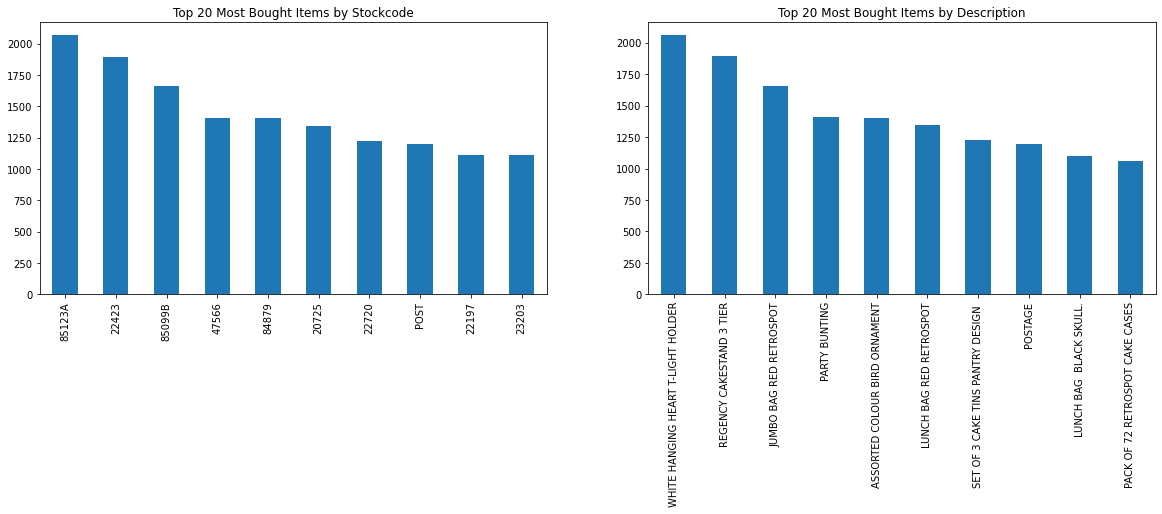

In [5]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
df['StockCode'].value_counts().head(10).plot.bar()
plt.title('Top 20 Most Bought Items by Stockcode')
plt.xticks(rotation = 90 )


plt.subplot(1,2,2)
df['Description'].value_counts().head(10).plot.bar()
plt.title('Top 20 Most Bought Items by Description')
plt.xticks(rotation = 90 )
plt.show()

Notice the 8th most bought item is called 'POST' / 'POSTAGE'. This indicates some of the stock codes may not represent a product. This needs further investigation.

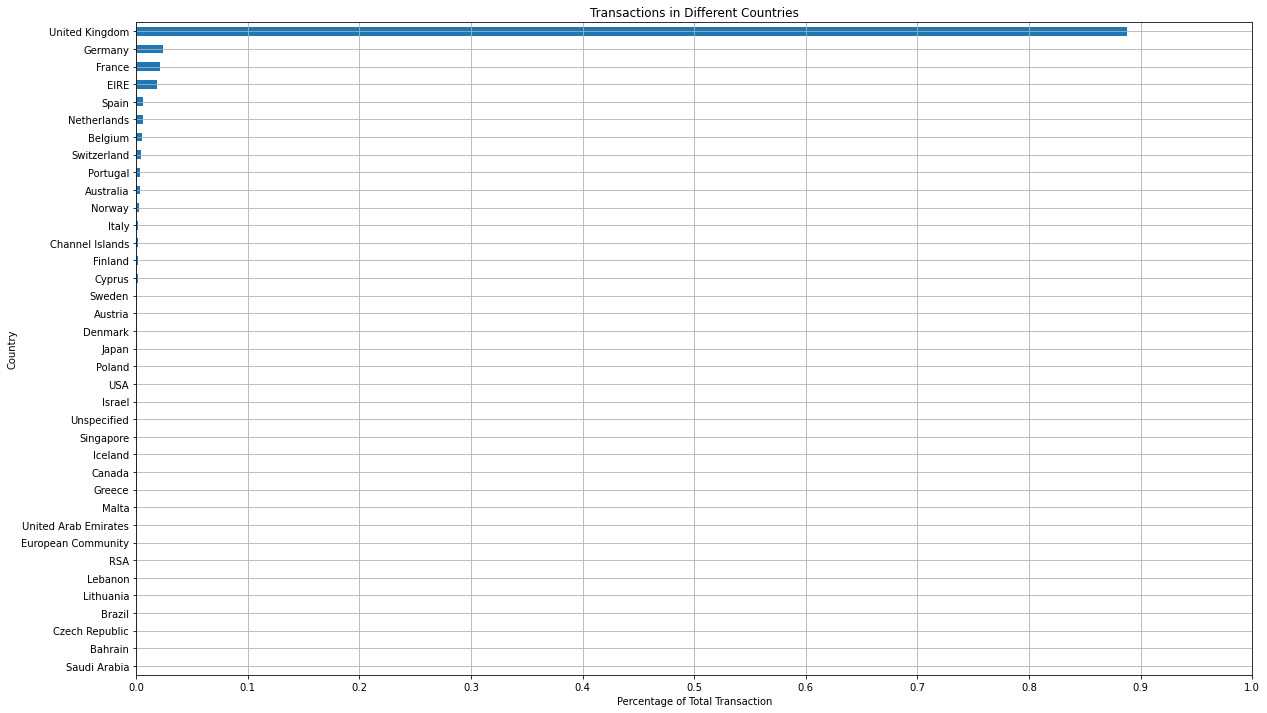

In [6]:
country_invoice = df.groupby('Country')['InvoiceNo'].count().sort_values() / len(df)
plt.subplots(figsize=(20,12))
country_invoice.plot(kind='barh')
plt.xlabel('Percentage of Total Transaction')
plt.ylabel('Country')
plt.title('Transactions in Different Countries')
plt.xticks(np.arange(0,1.05,0.1))
plt.grid()
plt.show()

Most of the customers are based in the UK, to make sure the dataset does not have any systematical error (did not input customer data from other countries), we will drop non-UK customers later.

[]

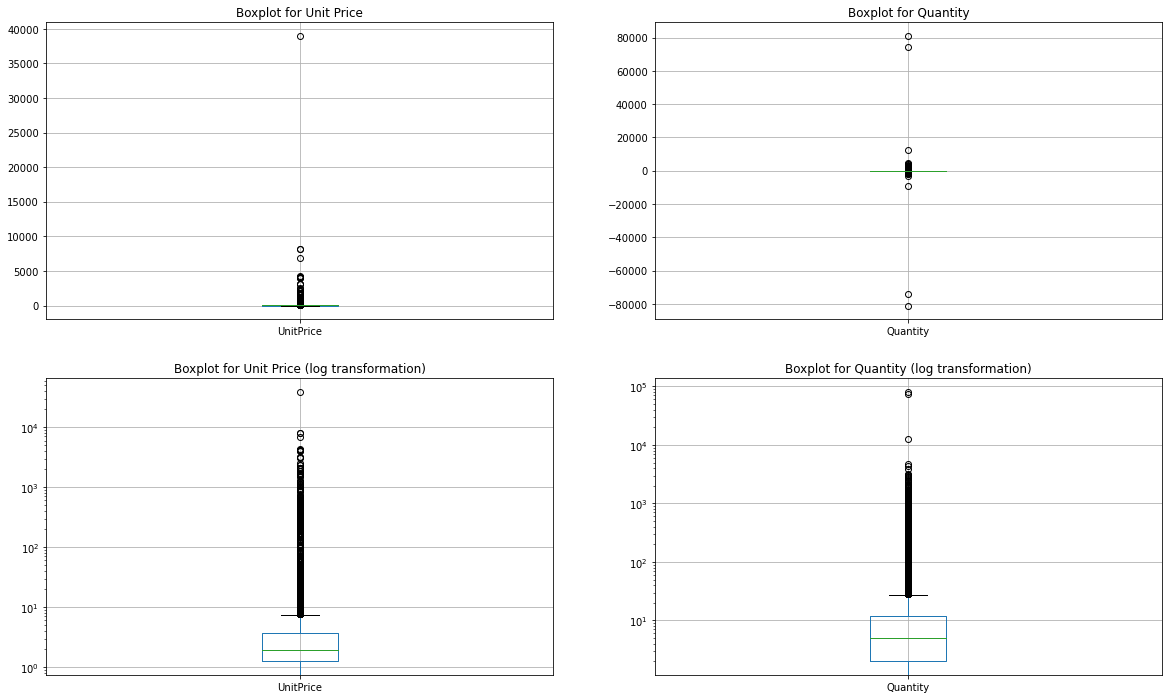

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
df.boxplot(column=['UnitPrice'])
plt.title('Boxplot for Unit Price')  

plt.subplot(2,2,2)
df.boxplot(column=['Quantity'])  
plt.title('Boxplot for Quantity')
plt.plot()

plt.subplot(2,2,3)
plt.yscale("log") # apply log to y-axis
df.boxplot(column=['UnitPrice'])  
plt.title('Boxplot for Unit Price (log transformation)')
plt.plot()

plt.subplot(2,2,4)
plt.yscale("log") # apply log to y-axis
df.boxplot(column=['Quantity'])  
plt.title('Boxplot for Quantity (log transformation)')
plt.plot()


Unit price and quantity have extreme outliers, this indicates outlier removal is necessary. Also how can we have negative quantities? This requires further investigation.

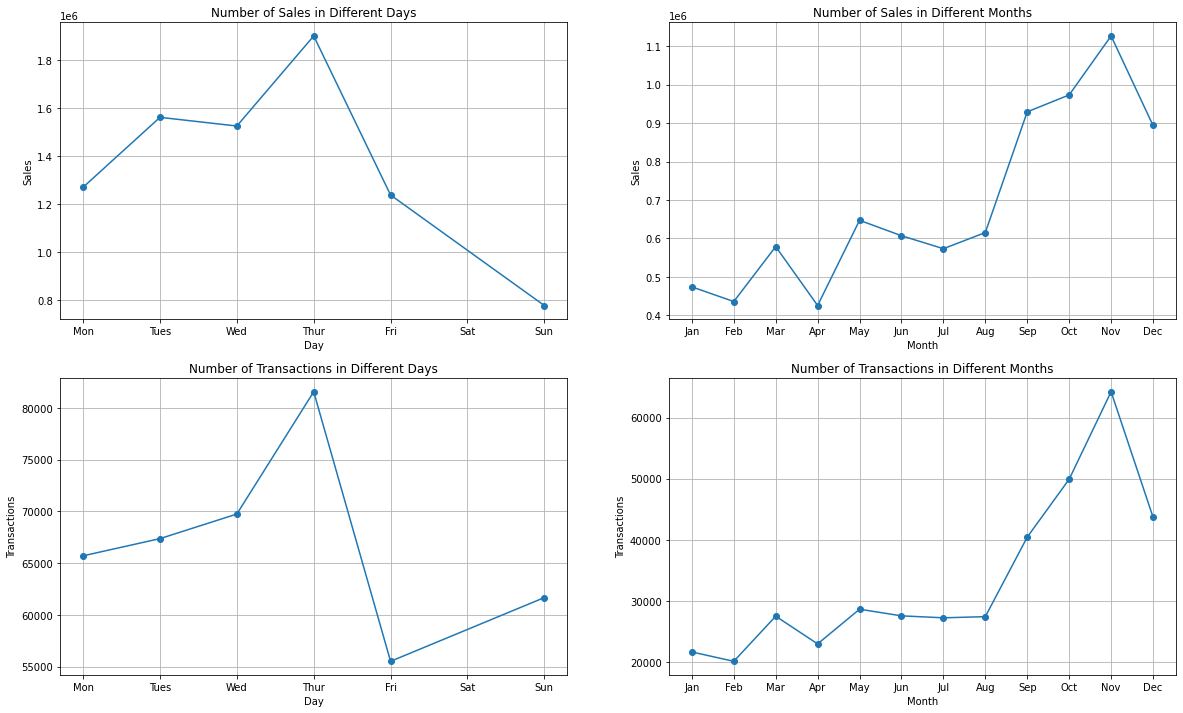

In [8]:
# analysing monthly and daily sales and transactions
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.dayofweek + 1 # need to add 1 because 'dayofweek' starts from 0 to 6
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] # add a total value of purchase
weekdays_num = [1,2,3,4,5,6,7]
weekdays = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
months_num = [1,2,3,4,5,6,7,8,9,10,11,12]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# plot the graphs
plt.subplots(figsize=(20,12))
plt.subplot(2,2,1)
df.groupby('Day').TotalPrice.sum().plot( marker='o')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Number of Sales in Different Days')
plt.xticks(weekdays_num, weekdays) 
plt.grid()


plt.subplot(2,2,2)
df.groupby('Month').TotalPrice.sum().plot( marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Number of Sales in Different Months')
plt.xticks(months_num, months)
plt.grid()

plt.subplot(2,2,3)
df.groupby('Day').InvoiceNo.count().plot( marker='o')
plt.xlabel('Day')
plt.ylabel('Transactions')
plt.title('Number of Transactions in Different Days')
plt.xticks(weekdays_num, weekdays) 
plt.grid()

plt.subplot(2,2,4)
df.groupby('Month').InvoiceNo.count().plot( marker='o')
plt.xlabel('Month')
plt.ylabel('Transactions')
plt.title('Number of Transactions in Different Months')
plt.xticks(months_num, months) 
plt.grid()


plt.show()

Interesting insights:

- There are no sales / transactions on Saturdays. Since there is no specific reason why customers are not shopping online on Saturdays, this indicates the e-commerce shop may be closed on Saturdays. 

-  Number of sales and transactions hit peak on November, this could be explained by a raise of purchasing during holiday seasons.


-  The sales on Fridays is much higher than the sales on Sundays, but the number of transactions on Sundays is higher than the number of transactions on Fridays. This is abnormal, this indicates some transactions do not generate revenue. This requires further investigation.


## **Data Cleaning and Feature Engineering**

Based on EDA, we need to investigate the following.

1. Strange values in stockcode, e.g. POST.

2. Need to drop all countries other than UK to avoid systematical bias.

3. Need to solve the problem of extreme outliers.

4. Negative values in quantity.

5. Some transactions are not generating revenues.

### Strange Stockcode

In [9]:
df[df['StockCode'] == 'POST']

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
45        536370      POST     POSTAGE         3 2010-12-01 08:45:00   
386       536403      POST     POSTAGE         1 2010-12-01 11:27:00   
1123      536527      POST     POSTAGE         1 2010-12-01 13:04:00   
5073      536840      POST     POSTAGE         1 2010-12-02 18:27:00   
5258      536852      POST     POSTAGE         1 2010-12-03 09:51:00   
...          ...       ...         ...       ...                 ...   
541198    581493      POST     POSTAGE         1 2011-12-09 10:10:00   
541216    581494      POST     POSTAGE         2 2011-12-09 10:13:00   
541730    581570      POST     POSTAGE         1 2011-12-09 11:59:00   
541767    581574      POST     POSTAGE         2 2011-12-09 12:09:00   
541768    581578      POST     POSTAGE         3 2011-12-09 12:16:00   

        UnitPrice  CustomerID      Country  Month  Day  TotalPrice  
45           18.0       12583       France     12    3        54.0  
386          15.0       12791  Netherlands     12    3        15.0  
1123         18.0       12662      Germany     12    3        18.0  
5073         18.0       12738      Germany     12    4        18.0  
5258         18.0       12686       France     12    5        18.0  
...           ...         ...          ...    ...  ...         ...  
541198       15.0       12423      Belgium     12    5        15.0  
541216       18.0       12518      Germany     12    5        36.0  
541730       18.0       12662      Germany     12    5        18.0  
541767       18.0       12526      Germany     12    5        36.0  
541768       18.0       12713      Germany     12    5        54.0  

[1196 rows x 11 columns]

Seems like postage is the cost of shipping. We do not really care about this as long as the cost is paid by customers (quantity / unit price are both positive). We will include these rows and simply treat them as part of customers' spending. Now let's have a look of other strange stockcodes.

In [10]:
# check stockcode contains letters
strange_stockcode = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
strange_stockcode

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [11]:
# Start by checking Stockcode 'D'
df[df['StockCode'] == 'D']

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
141      C536379         D    Discount        -1 2010-12-01 09:41:00   
9038     C537164         D    Discount        -1 2010-12-05 13:21:00   
14498    C537597         D    Discount        -1 2010-12-07 12:34:00   
19392    C537857         D    Discount        -1 2010-12-08 16:00:00   
31134    C538897         D    Discount        -1 2010-12-15 09:14:00   
...          ...       ...         ...       ...                 ...   
479868   C577227         D    Discount        -1 2011-11-18 12:06:00   
479869   C577227         D    Discount        -1 2011-11-18 12:06:00   
493613   C578239         D    Discount        -1 2011-11-23 12:29:00   
516221   C579884         D    Discount        -1 2011-11-30 17:34:00   
516455   C579908         D    Discount        -1 2011-12-01 08:49:00   

        UnitPrice  CustomerID         Country  Month  Day  TotalPrice  
141         27.50       14527  United Kingdom     12    3      -27.50  
9038        29.29       14527  United Kingdom     12    7      -29.29  
14498      281.00       15498  United Kingdom     12    2     -281.00  
19392      267.12       17340  United Kingdom     12    3     -267.12  
31134        5.76       16422  United Kingdom     12    3       -5.76  
...           ...         ...             ...    ...  ...         ...  
479868      19.82       14527  United Kingdom     11    5      -19.82  
479869      16.76       14527  United Kingdom     11    5      -16.76  
493613      26.33       14912           Italy     11    3      -26.33  
516221      20.53       14527  United Kingdom     11    3      -20.53  
516455      28.68       14527  United Kingdom     12    4      -28.68  

[77 rows x 11 columns]

Stockcode 'D' represents discount. Here are few things noticible.

- InvoiceNo starting with C.

- Quantity is negative.

Negative quantity seems to indicate the company is paying for an order and this may link to InvoiceNo starting with C. We need to get rid of all such rows as we only want a dataset that solely represents customers' spending, not company's or both.

#Quantity is negative, could this be return order, or cancelled order? 

- Investigate all Invoices starting with 'C', 

- could there be other abnormal orders?

In [12]:
# check all orders starting with 'C'
df[df['InvoiceNo'].apply(lambda l: l[0]=="C")]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  Month  Day  \
141    2010-12-01 09:41:00      27.50       14527  United Kingdom     12    3   
154    2010-12-01 09:49:00       4.65       15311  United Kingdom     12    3   
235    2010-12-01 10:24:00       1.65       17548  United Kingdom     12    3   
236    2010-12-01 10:24:00       0.29       17548  United Kingdom     12    3   
237    2010-12-01 10:24:00       0.29       17548  United Kingdom     12    3   
...                    ...        ...         ...             ...    ...  ...   
540449 2011-12-09 09:57:00       0.83       14397  United Kingdom     12    5   
541541 2011-12-09 10:28:00     224.69       15498  United Kingdom     12    5   
541715 2011-12-09 11:57:00      10.95       15311  United Kingdom     12    5   
541716 2011-12-09 11:58:00       1.25       17315  United Kingdom     12    5   
541717 2011-12-09 11:58:00       1.25       17315  United Kingdom     12    5   

        TotalPrice  
141         -27.50  
154          -4.65  
235         -19.80  
236          -6.96  
237          -6.96  
...            ...  
540449       -9.13  
541541     -224.69  
541715      -54.75  
541716       -1.25  
541717       -6.25  

[8872 rows x 11 columns]

We found some interesting results. 

- seems like all C has negative quantity

- Index 141 represents 'Discount' (StockCode is 'D' and Description is 'Discount'). 

- Index 541541 has decription being 'Manual' and StockCode 'M', but it's unclear what it represents. 

This is getting messy, most likely there will be other abnormal entries. it's hard to analyse these orders without knowing the business context.

In [13]:
len(df[df['InvoiceNo'].apply(lambda l: l[0]=="C")])/len(df) * 100

2.209141343213713

These orders is only 2.2% of the dataset, we can just drop them. (analysing customers, not needed to understand these data anyways) cancelling orders are not a significant factor in customer segmentation anyways

In [14]:
df = df.drop(df[df['InvoiceNo'].apply(lambda l: l[0]=="C")].index)

Is there any other strange InvoiceNo?

In [15]:
list_special_codes = df[df['InvoiceNo'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array([], dtype=object)

Seems all the strange entries are dropped

In [16]:
# check if we still have negative quantity entries
df[df['Quantity'] <0]['InvoiceNo'].count()

0

In [17]:
# reset index
df.reset_index()

index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
392727  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
392728  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
392729  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
392730  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
392731  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity         InvoiceDate  UnitPrice  CustomerID         Country  \
0              6 2010-12-01 08:26:00       2.55       17850  United Kingdom   
1              6 2010-12-01 08:26:00       3.39       17850  United Kingdom   
2              8 2010-12-01 08:26:00       2.75       17850  United Kingdom   
3              6 2010-12-01 08:26:00       3.39       17850  United Kingdom   
4              6 2010-12-01 08:26:00       3.39       17850  United Kingdom   
...          ...                 ...        ...         ...             ...   
392727        12 2011-12-09 12:50:00       0.85       12680          France   
392728         6 2011-12-09 12:50:00       2.10       12680          France   
392729         4 2011-12-09 12:50:00       4.15       12680          France   
392730         4 2011-12-09 12:50:00       4.15       12680          France   
392731         3 2011-12-09 12:50:00       4.95       12680          France   

        Month  Day  TotalPrice  
0          12    3       15.30  
1          12    3       20.34  
2          12    3       22.00  
3          12    3       20.34  
4          12    3       20.34  
...       ...  ...         ...  
392727     12    5       10.20  
392728     12    5       12.60  
392729     12    5       16.60  
392730     12    5       16.60  
392731     12    5       14.85  

[392732 rows x 12 columns]

Satisfied our assumptions, only C has negative quantities. Get rid of them give us a cleaner dataset for customer segmentation.

Five main aspects to consider for segmentation

- Consider RFM from marketing analytics module (recency, frequency, monetary)

- what did the cutomer buy - category (later)

- how many of the products did the customer order - to identify who buys products in bulk, maybe they are wholesellers

-  what season did the customer buy (cant because K-mean need continuous data)


In [18]:
# set a new data framework of customers info, we will use this data frame for customer segmentation

# construct a new dataframe with RFM
customer = df.groupby('CustomerID')[['TotalPrice']].sum() # Total amount spent
customer.rename(columns={'TotalPrice':'Monetary'},inplace=True)
customer['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].count()
max_date = max(df['InvoiceDate'])
df['diff'] = max_date - df['InvoiceDate']
customer['Recency'] = df.groupby('CustomerID')['diff'].min().dt.days
# add total quality
#customer['TotalQuantity'] = df.groupby('CustomerID')['Quantity'].sum()

# drop customerID
customer = customer.reset_index()
customer = customer.drop(columns = ['CustomerID'])
customer

Monetary  Frequency  Recency
0     77183.60          1      325
1      4310.00        182        1
2      1797.24         31       74
3      1757.55         73       18
4       334.40         17      309
...        ...        ...      ...
4334    180.60         10      277
4335     80.82          7      180
4336    178.05         12        7
4337   2045.53        721        3
4338   1837.28         70       42

[4339 rows x 3 columns]

           Monetary  Frequency   Recency
Monetary   1.000000   0.425442 -0.121780
Frequency  0.425442   1.000000 -0.206348
Recency   -0.121780  -0.206348  1.000000


<AxesSubplot:>

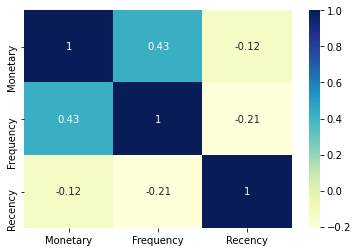

In [19]:
print(customer.corr())
sns.heatmap(customer.corr(),cmap="YlGnBu", annot=True) #cmap change

We see strong correlations, this is a good sign for clustering.

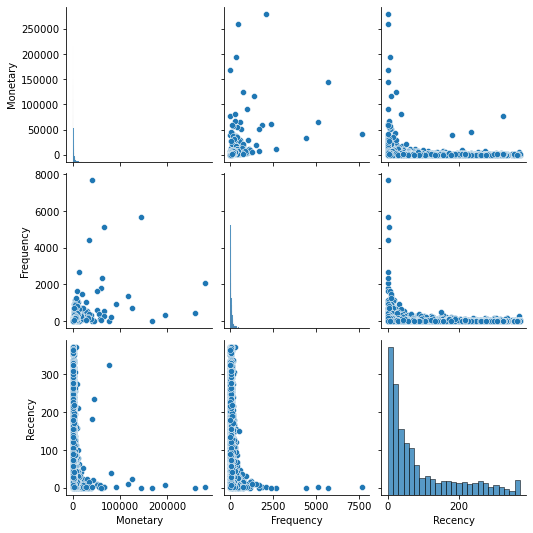

In [20]:
sns.pairplot(data=customer);
#sns.displot(data = Customer) #problematic

The scales of each feature are different. We also notice the outlier effect is strong. We need to deal with both situations as some clustering models are very sensitive with scale and outliers.

<ipython-input-21-24565c6fd191>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer.iloc[:,j][customer.iloc[:,j] > customer.iloc[:,j].quantile(0.95)] = customer.iloc[:,j].quantile(0.95)
<ipython-input-21-24565c6fd191>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer.iloc[:,j][customer.iloc[:,j] < customer.iloc[:,j].quantile(0.05)] = customer.iloc[:,j].quantile(0.05)
<ipython-input-21-24565c6fd191>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

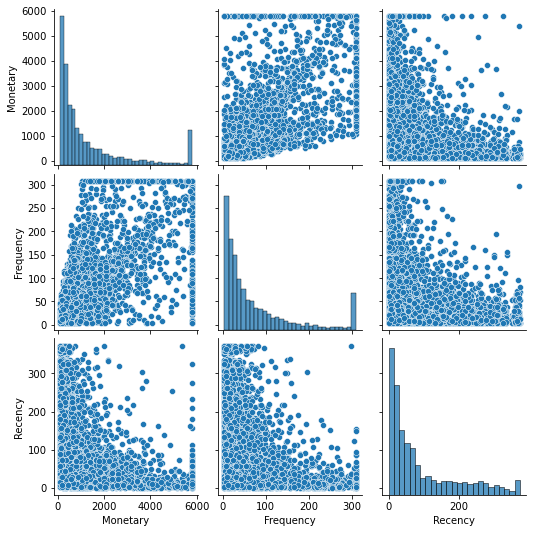

In [21]:
# get rid of the outlier effect by replacing the top and low 5% quantiles of each feature
for j in range(0,2):
    customer.iloc[:,j][customer.iloc[:,j] > customer.iloc[:,j].quantile(0.95)] = customer.iloc[:,j].quantile(0.95)
    customer.iloc[:,j][customer.iloc[:,j] < customer.iloc[:,j].quantile(0.05)] = customer.iloc[:,j].quantile(0.05)

sns.pairplot(data=customer)

Outliers effect is reduced. Now scale the feature. We will consider minmax scaling.

In [22]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
customer_minmax = pd.DataFrame(scaler.fit_transform(customer), columns=customer.columns)


## **Model Implementation**

3 models, each model ran on minmax and z-score

do all normalisation before

Implement different models, number of clusters is 3.

### Dimension Reduction

In [23]:
# for better clustering results and visualisations, we now reduce the dimension to 2 using PCA.
pca = PCA(n_components=2, random_state = 42)
df_pca_minmax = pd.DataFrame(pca.fit_transform(customer_minmax), columns = ['PCA_1', 'PCA_2'])
df_pca_minmax

PCA_1     PCA_2
0     0.054395  0.758501
1     0.665209  0.075260
2    -0.015235 -0.054869
3     0.137408 -0.148604
4    -0.493281  0.401463
...        ...       ...
4334 -0.485353  0.308933
4335 -0.379802  0.070845
4336 -0.149197 -0.331911
4337  0.679998  0.068108
4338  0.110280 -0.089621

[4339 rows x 2 columns]

### **K-means with MinMax Normalisation**

Based on our business objective, the number of cluster (k number) is 3.

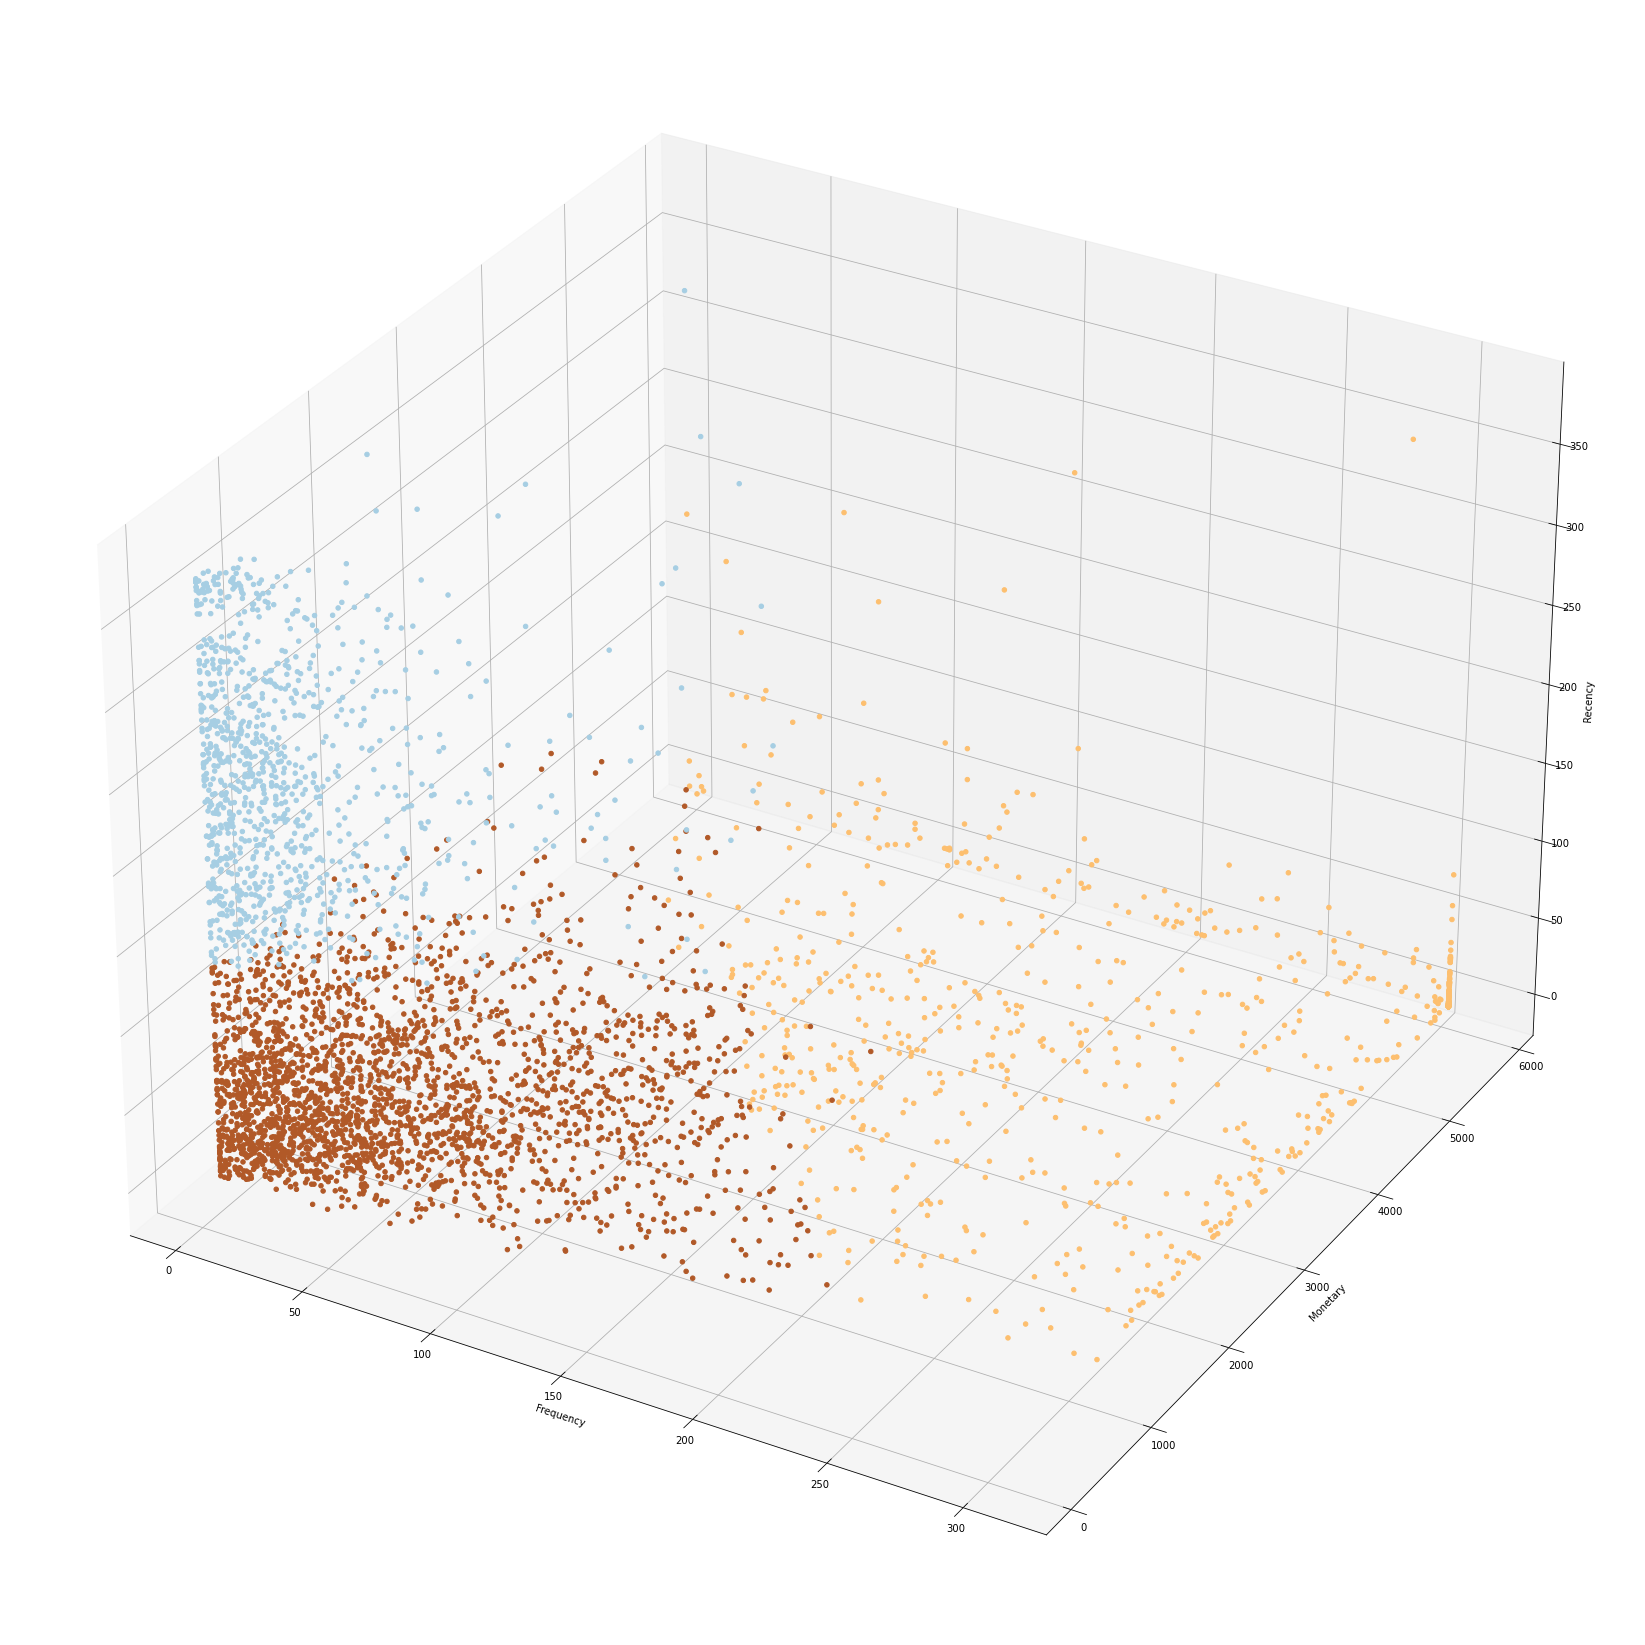

In [24]:
# set k number and run the model
k=3
kmeans = KMeans(n_clusters=k,max_iter=50,random_state=42)
y_pred = kmeans.fit_predict(df_pca_minmax)

# add cluster labels to dataframe
customer_model1 = customer.copy()
customer_model1['cluster_id'] = kmeans.labels_

# plot a 3d garph for the clusters
fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot( projection = '3d')
# set x,y,z axis
x = customer_model1['Frequency']
y = customer_model1['Monetary']
z = customer_model1['Recency']
# set color map
cmap = ListedColormap(sns.color_palette("Paired"))
# set axis name
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency") 
# 3d scatter plot  
ax.scatter(x, y, z, c = customer_model1['cluster_id'], cmap = cmap, alpha=1 )
plt.show()

In [25]:
# Vusialising clusters using Principle Components
#fig = plt.figure(figsize=[15,10])

#sns.scatterplot(data=df_pca_minmax,x="PCA_1",y="PCA_2",hue="cluster_id",size="cluster_id", cmap = cmap)
#plt.show()

#### Evaluation on $k$ 

Now let's evaluate how good the clustering is when $k=3$. We will consider the SSD socre and silhouette score.

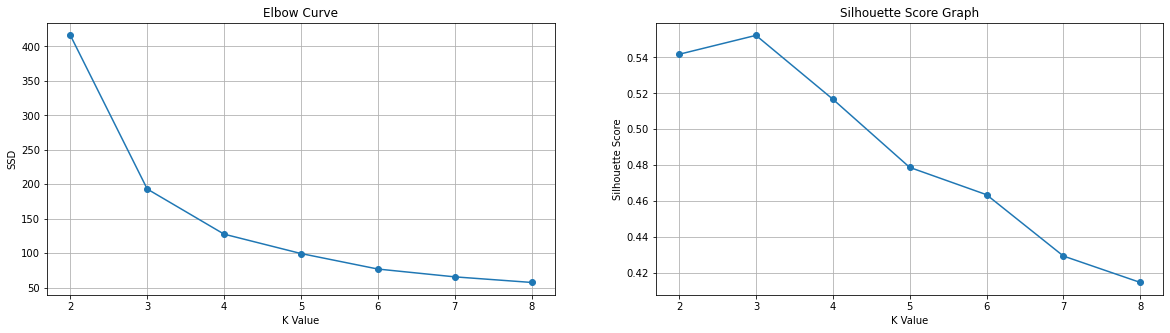

In [26]:
# compute ssd score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(df_pca_minmax)
    ssd.append(kmeans.inertia_)

# compute silhouette score
sil_scores = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(df_pca_minmax)
    cluster_labels = kmeans.labels_
    sil_avg = silhouette_score(df_pca_minmax, cluster_labels)
    sil_scores.append(sil_avg)

# construct the plot    
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range_n_clusters,ssd, marker = 'o')
plt.xlabel('K Value')
plt.ylabel('SSD')
plt.title('Elbow Curve')
plt.grid()

plt.subplot(1,2,2)
plt.plot(range_n_clusters,sil_scores, marker = 'o')
plt.xlabel('K Value')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Graph')
plt.grid()
plt.show()

We see the best number of $k$ based on SSD and Silhouette scores is 3. This is great, our business objective corresponds with the best hyperparameter.

### **K-means with Z-score Normalisation**

In [27]:
# z-score standardisation
customer_z = customer.copy()
customer_z = (customer_z-customer_z.mean())/(customer_z.std())
df_pca_z = pd.DataFrame(pca.fit_transform(customer_z), columns = ['PCA_1', 'PCA_2'])

Again, set $k=3$.

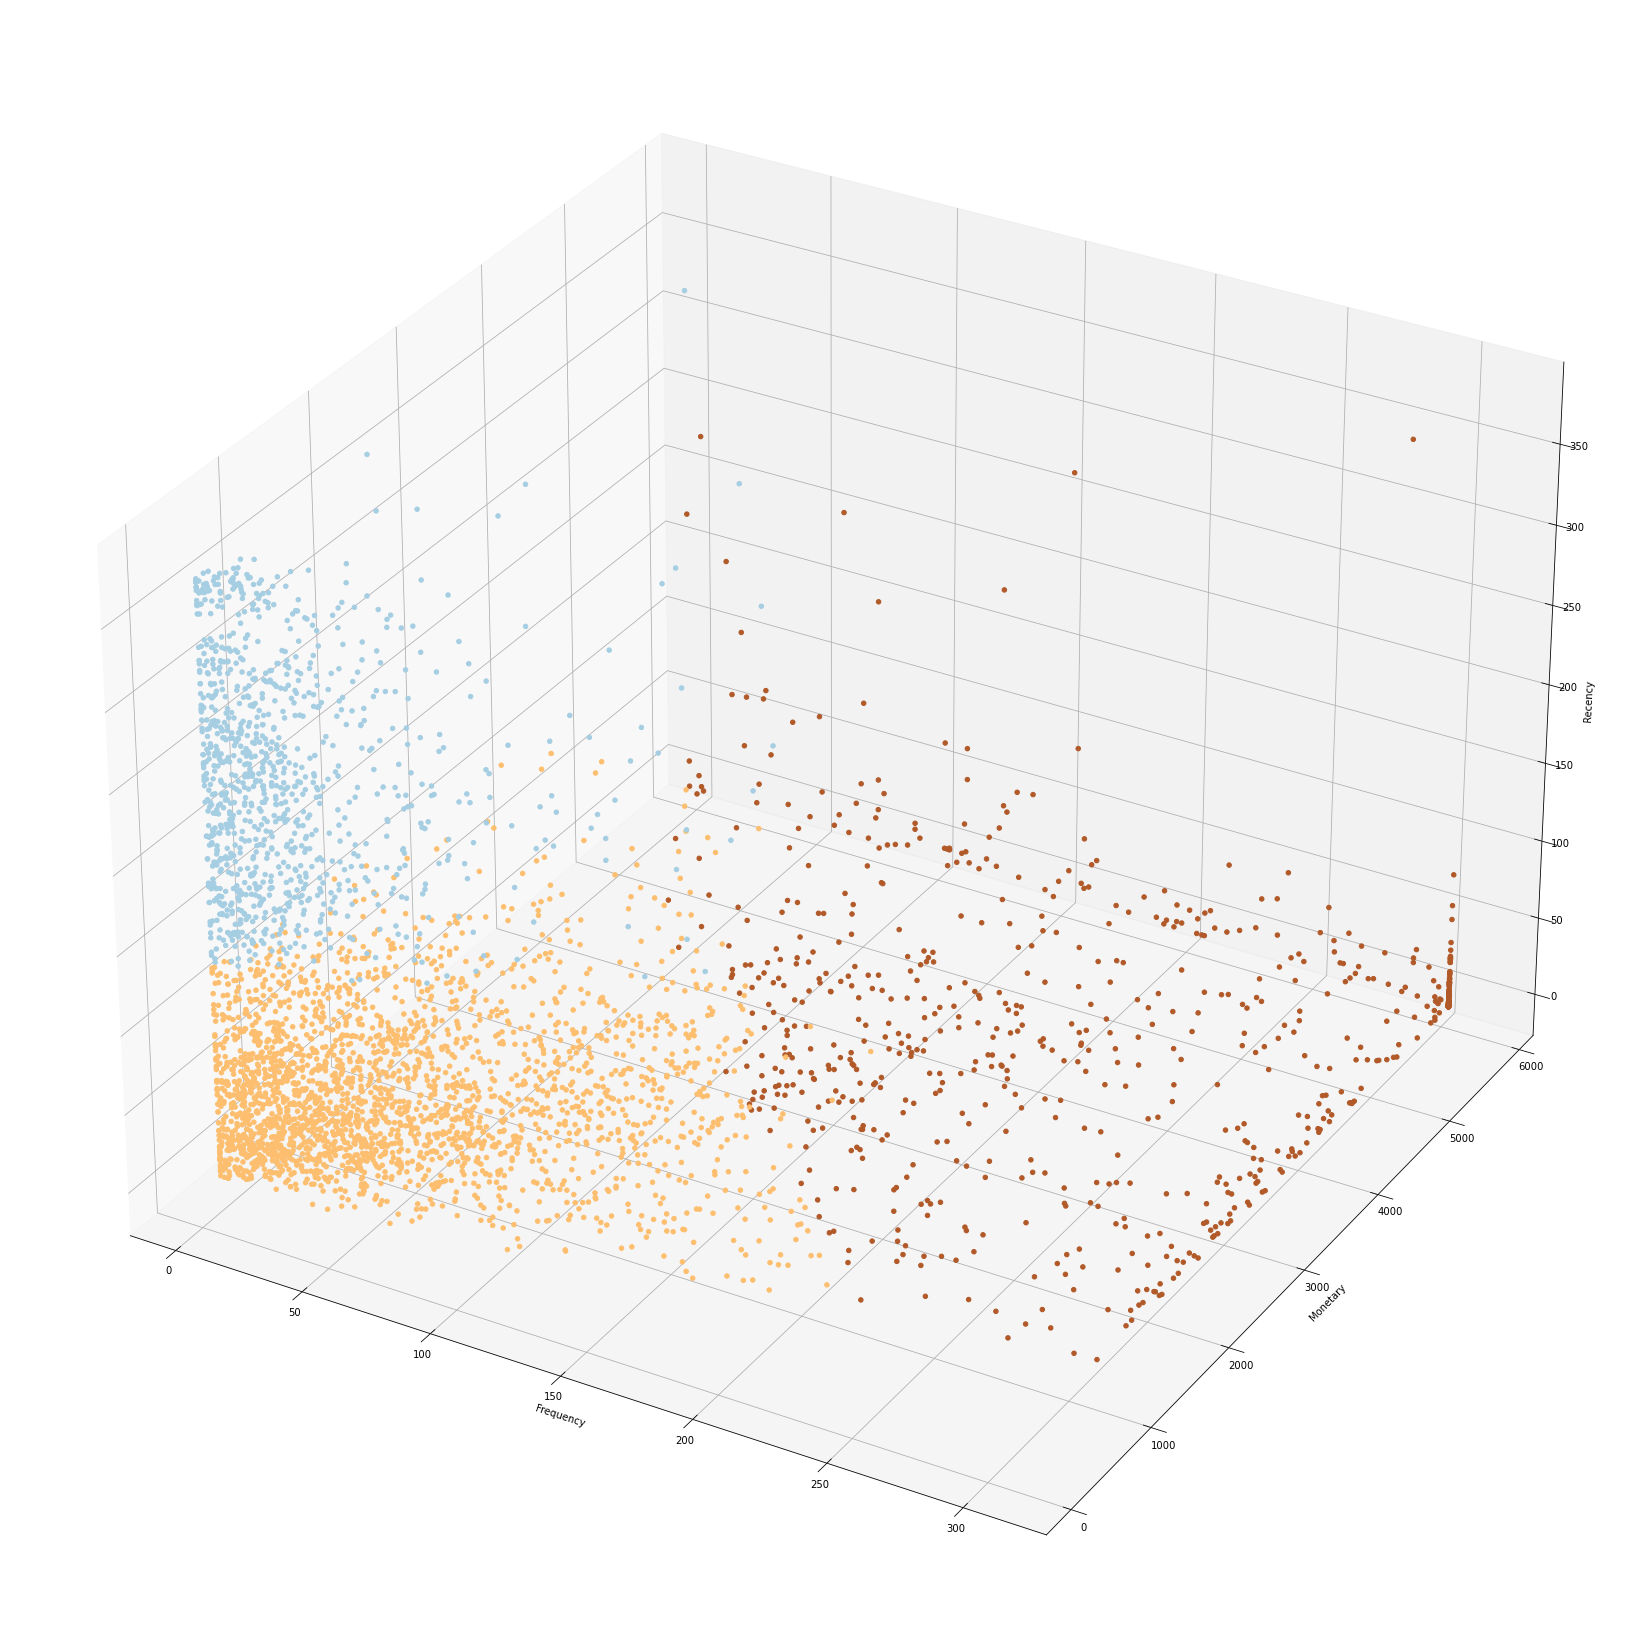

In [28]:
# set k number and run the model
k=3
kmeans = KMeans(n_clusters=k, max_iter=50, random_state=42)
y_pred = kmeans.fit_predict(df_pca_z)

# add cluster labels to dataframe
customer_model2 = customer.copy()
customer_model2['cluster_id'] = kmeans.labels_

# plot the 3d graph
fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot( projection = '3d')
x = customer_model2['Frequency']
y = customer_model2['Monetary']
z = customer_model2['Recency']
cmap = ListedColormap(sns.color_palette("Paired"))
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency")   
ax.scatter(x, y, z, c = customer_model2['cluster_id'], cmap = cmap , alpha=1)
plt.show()

Comparing to the previous model, we can only see slight changes around the boundaries. We do not see a huge change in clustering results.

#### Evaluation on $k$

Similar with last K-means model, we want to how good the clustering is when $k=3$.

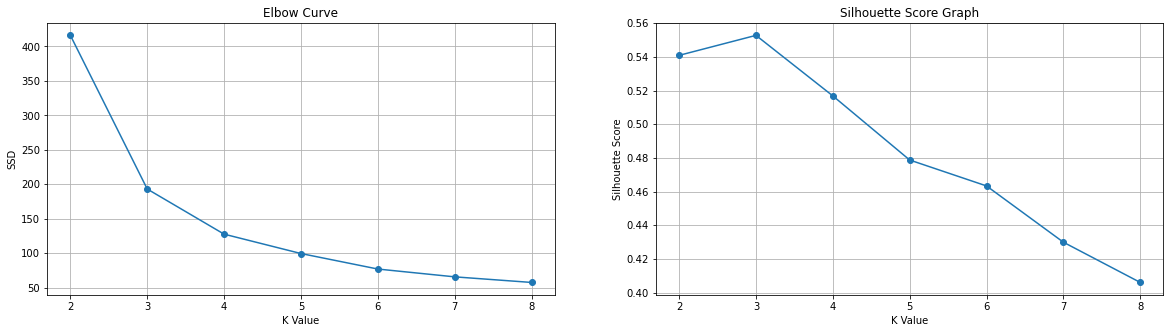

In [29]:
# compute ssd and sil scores
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(df_pca_minmax)
    ssd.append(kmeans.inertia_)

sil_scores = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca_z)
    cluster_labels = kmeans.labels_
    sil_avg = silhouette_score(df_pca_z, cluster_labels)
    sil_scores.append(sil_avg)

#plot the graphs
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range_n_clusters,ssd, marker = 'o')
plt.xlabel('K Value')
plt.ylabel('SSD')
plt.title('Elbow Curve')
plt.grid()

plt.subplot(1,2,2)
plt.plot(range_n_clusters,sil_scores, marker = 'o')
plt.xlabel('K Value')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Graph')
plt.grid()
plt.show()

 The best number of clustering once again corresponds with our business objective ($k=3$). 

### **DBSCAN with MinMax Normalisation**

Now we implement DBSAN, we start by finding the right value for hyperparameters $\epsilon$ and min sample.

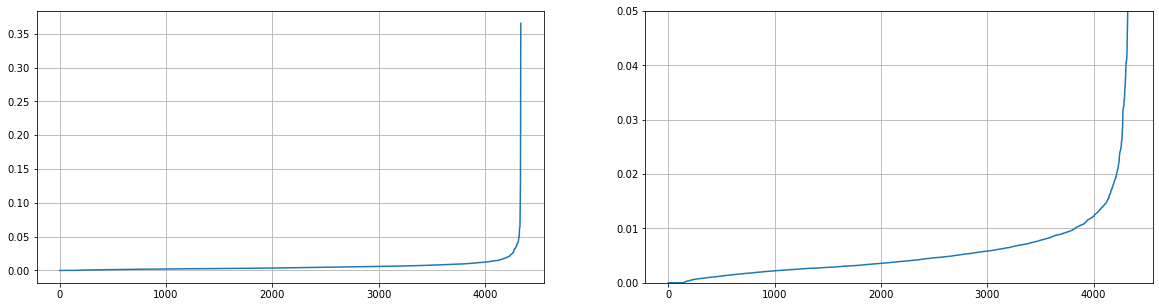

In [43]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_pca_minmax)
distances, indices = nbrs.kneighbors(df_pca_minmax)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

# plot the graph
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.grid()
plt.plot(distances)

plt.subplot(1,2,2)
plt.grid()
plt.ylim(0,0.05)
plt.plot(distances)
plt.show()

The optimal value for $\epsilon$ will be found at the point of maximum curvature (ref https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc), we will take $\epsilon = 0.012$. For min samples number, we choose it to be $4$ as we are using a 2D data (PCA) to run the model (https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan).

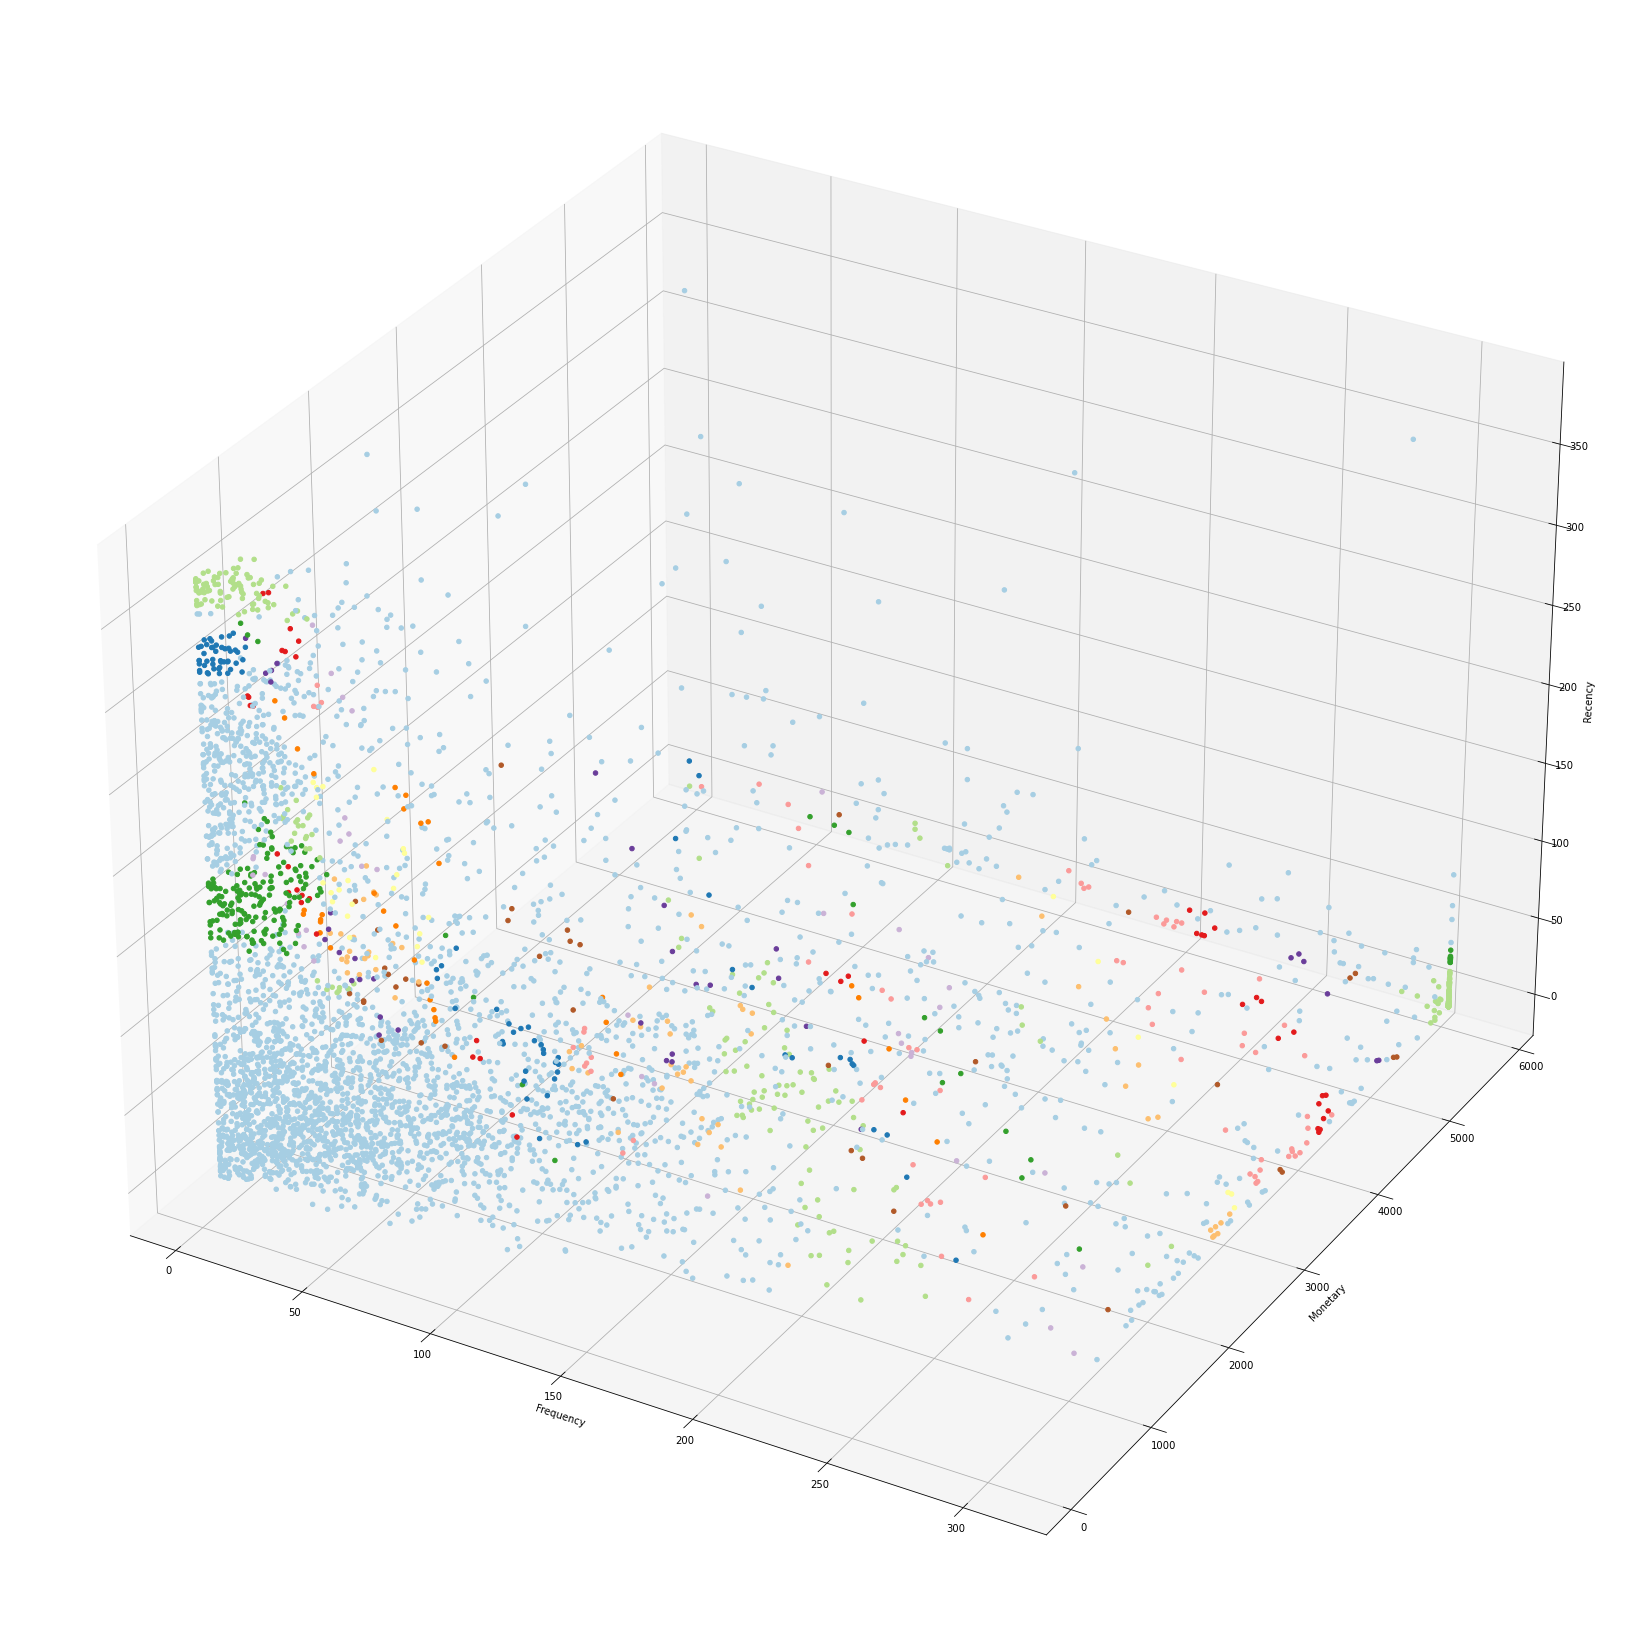

In [30]:
# set hyperparameters and run the model
dbscan_1 = DBSCAN(eps = 0.012, min_samples = 4)
dbscan_1.fit(df_pca_minmax)
customer_model3 = customer.copy()
customer_model3['cluster_id'] = dbscan_1.labels_

# plot the 3d graph
fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot( projection = '3d')
x = customer_model3['Frequency']
y = customer_model3['Monetary']
z = customer_model3['Recency']
cmap = ListedColormap(sns.color_palette("Paired"))
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency")   
ax.scatter(x, y, z, c = customer_model3['cluster_id'], cmap = cmap , alpha=1)
plt.show()

This clustering is not satisfying our business objective, we want the number of clusters to be around 3. After trying different values of $\epsilon$, I find the clustering is resonablely good when $\epsilon = 0.25$.

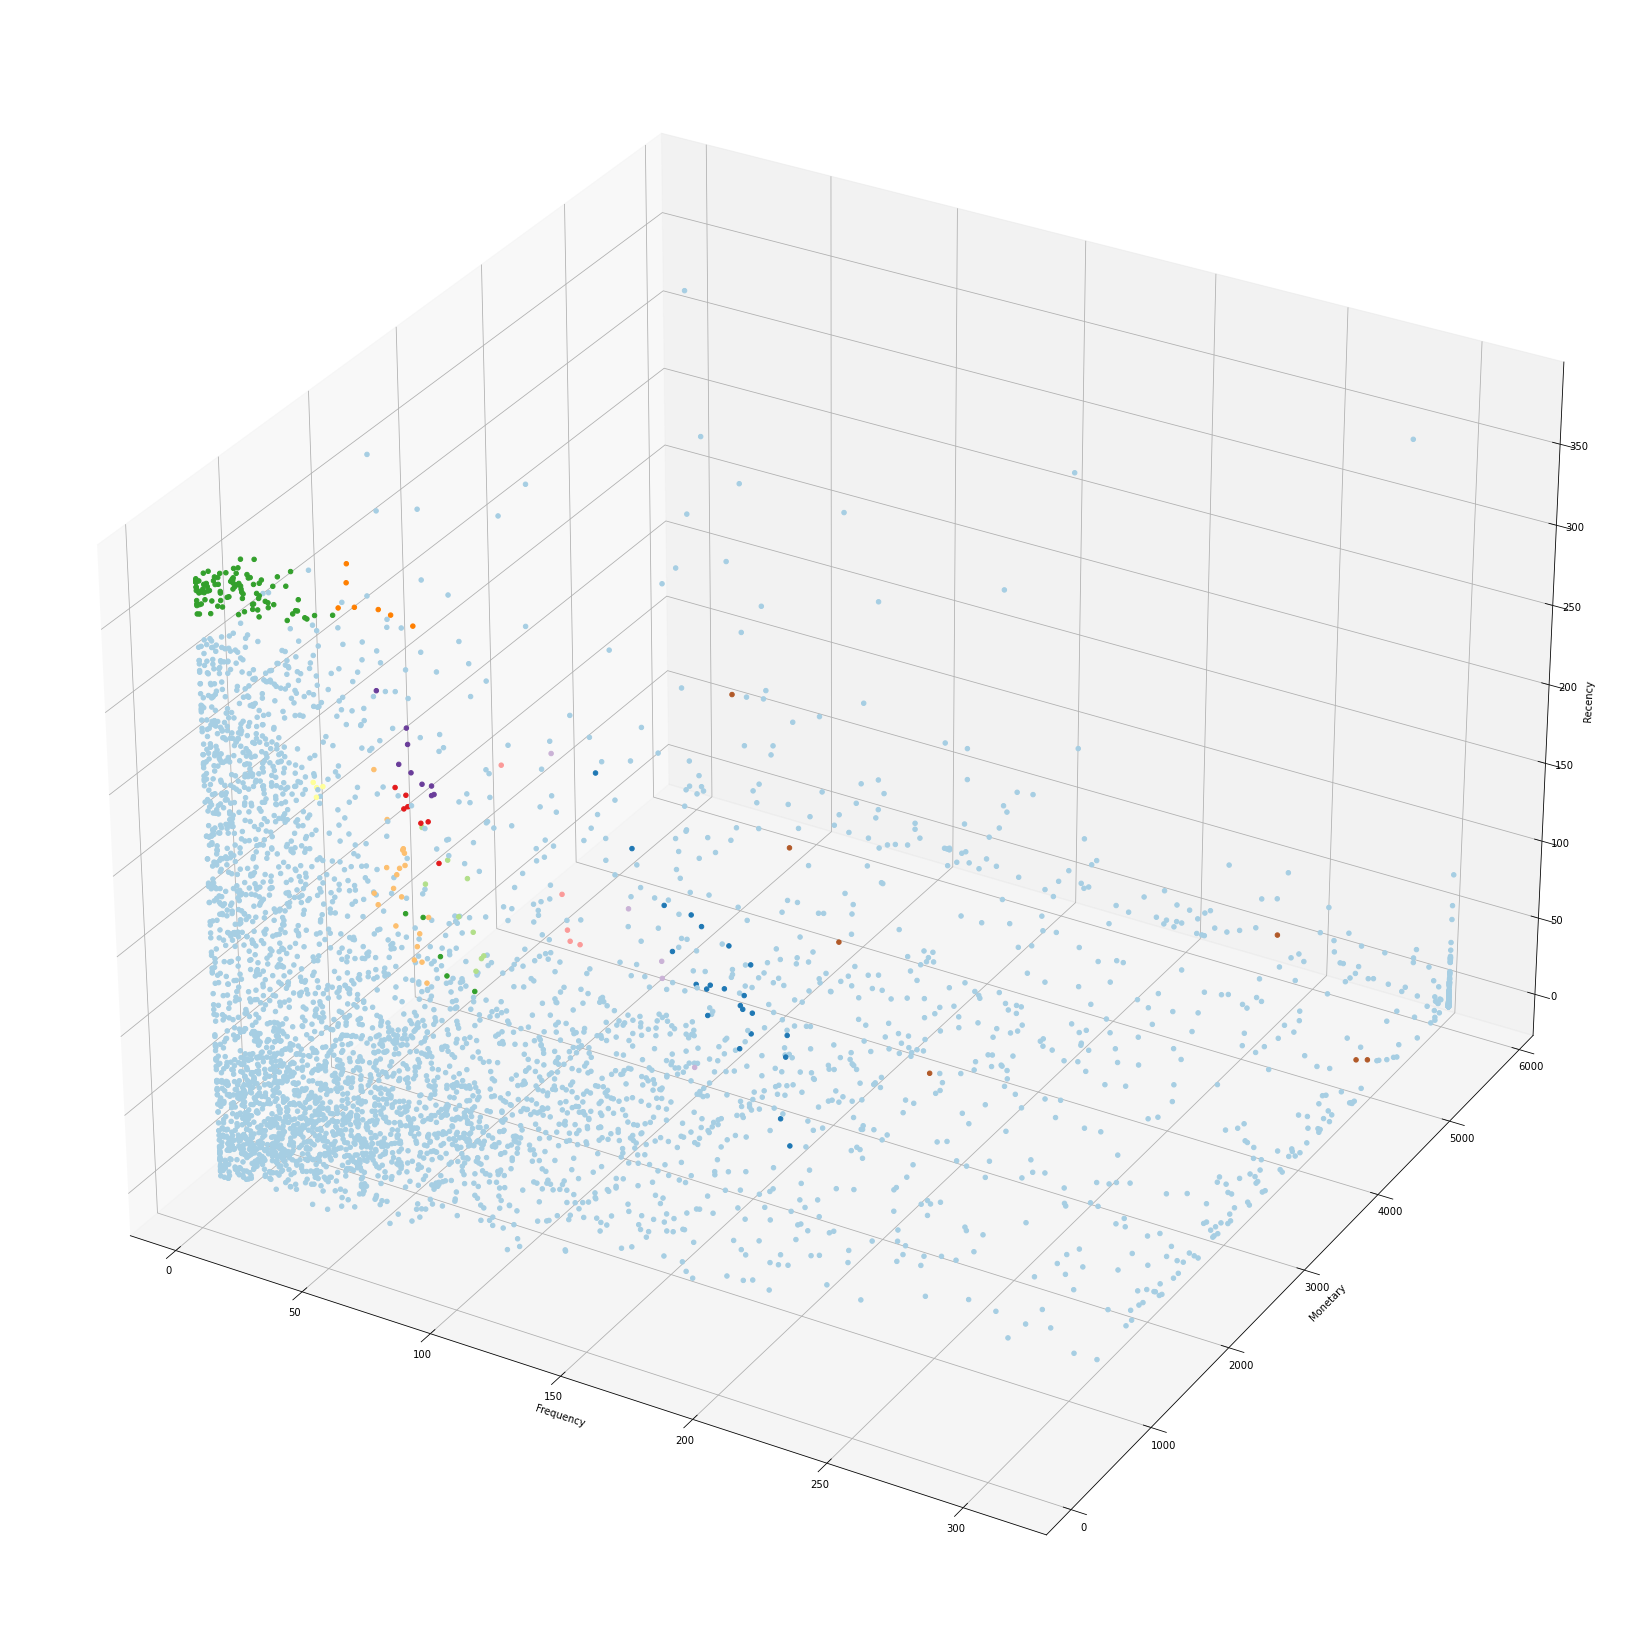

In [31]:
# set hyperparameters and run the model
dbscan_2 = DBSCAN(eps = 0.02, min_samples = 4)
dbscan_2.fit(df_pca_minmax)
customer_model4 = customer.copy()
customer_model4['cluster_id'] = dbscan_2.labels_


# plot the 3d graph
fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot( projection = '3d')
x = customer_model4['Frequency']
y = customer_model4['Monetary']
z = customer_model4['Recency']
cmap = ListedColormap(sns.color_palette("Paired"))
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency")   
ax.scatter(x, y, z, c = customer_model4['cluster_id'], cmap = cmap , alpha=1)
plt.show()

The model seems to be more rubust than K-means as it introduces outliers.

### **DBSCAN with Z-score Normalisation**

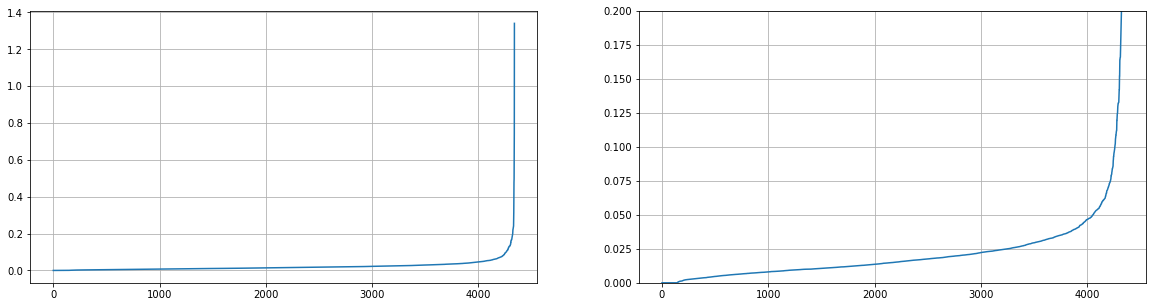

In [44]:
# find the best epsilon
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_pca_z)
distances, indices = nbrs.kneighbors(df_pca_z)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

# plot the graph
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.grid()
plt.plot(distances)

plt.subplot(1,2,2)
plt.grid()
plt.ylim(0,0.2)
plt.plot(distances)
plt.show()

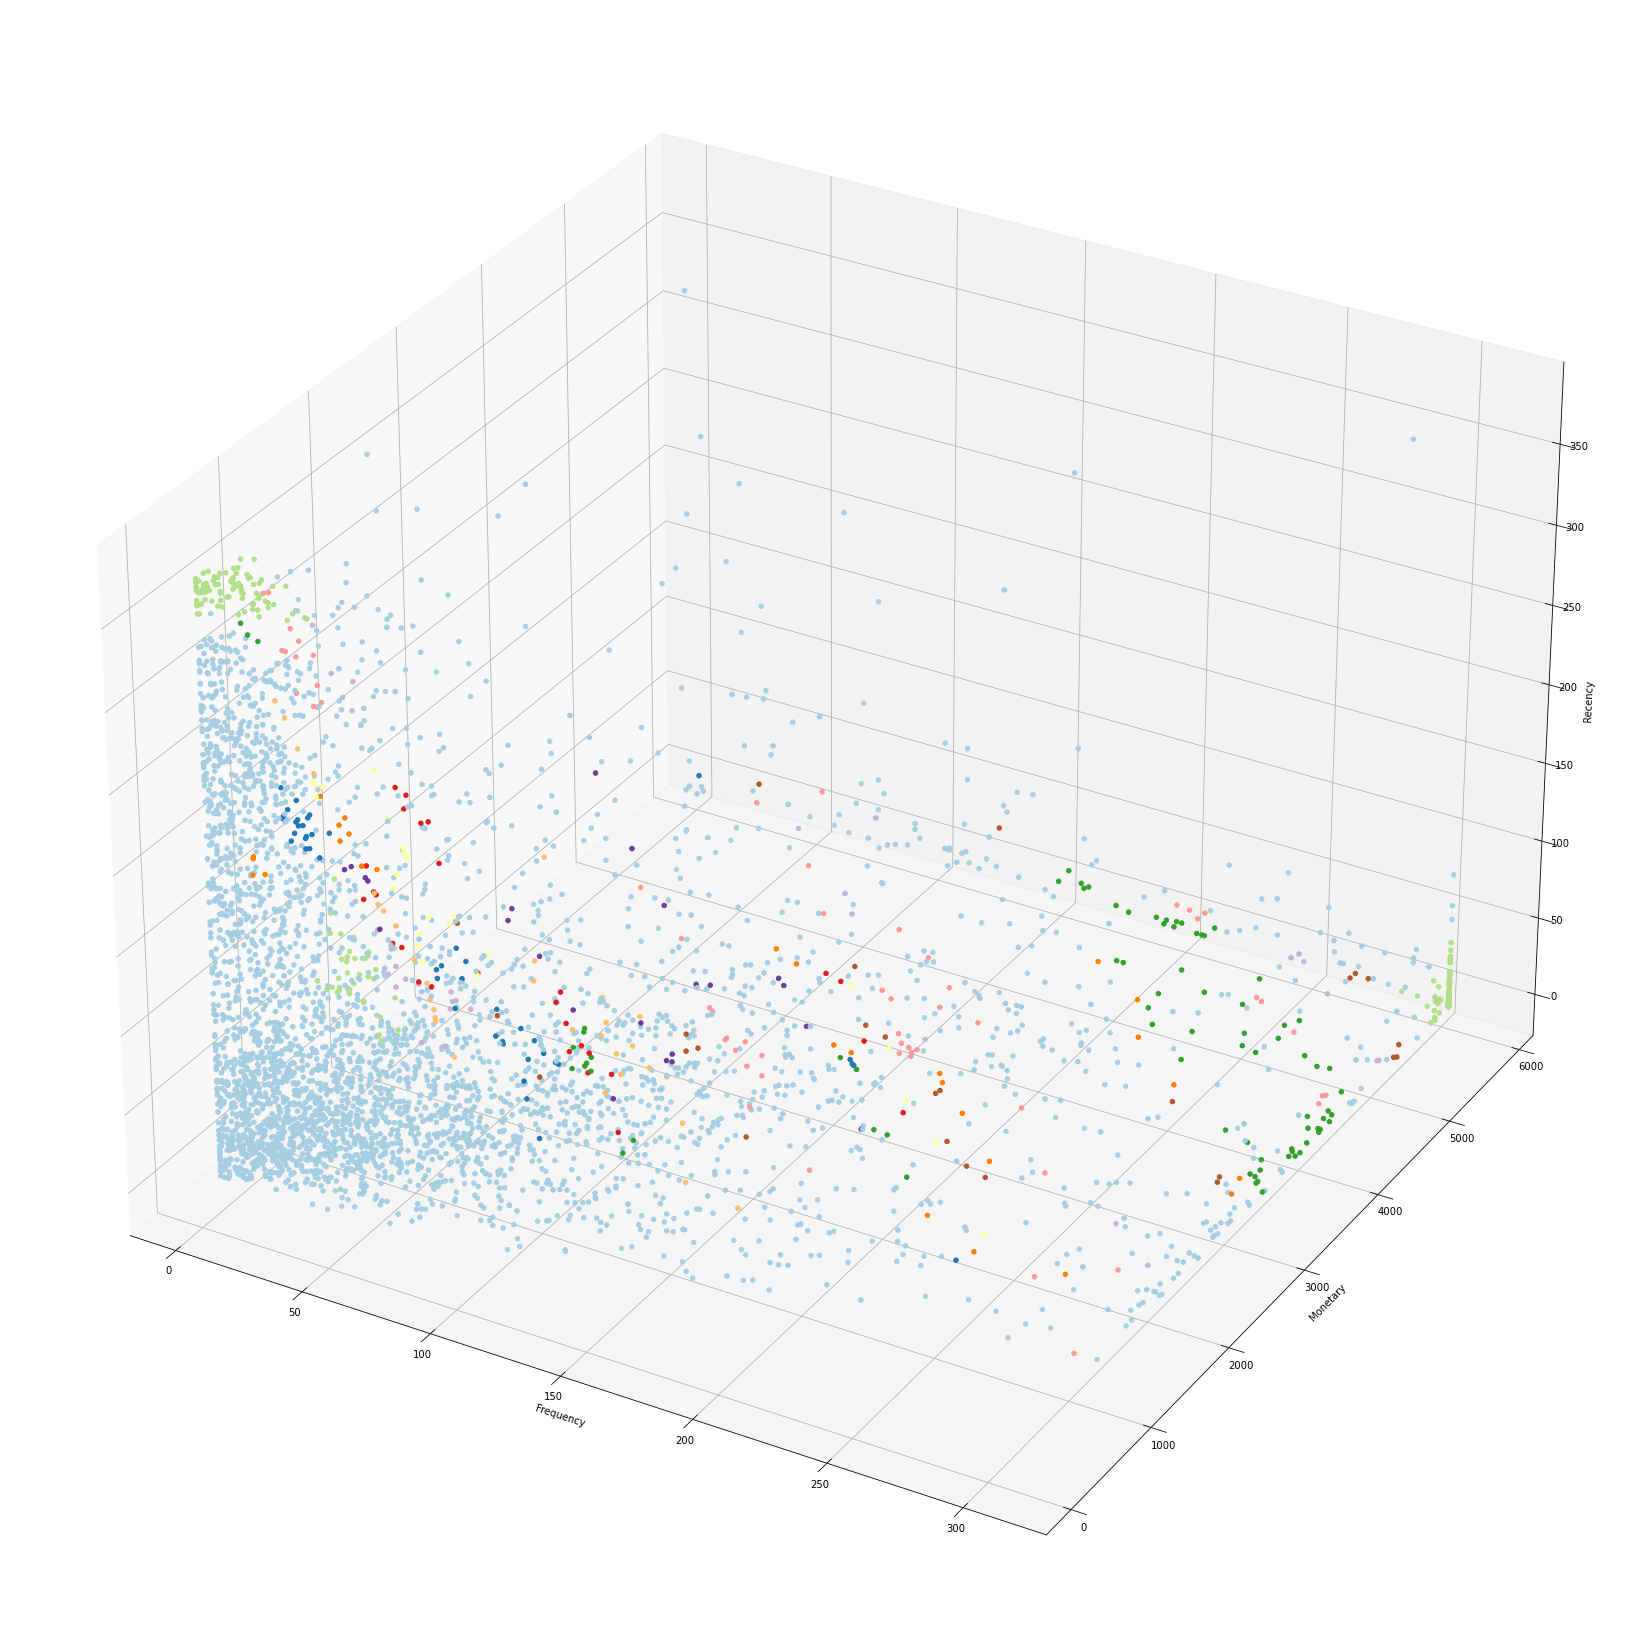

In [32]:
# choose eps = 0.05
dbscan_3 = DBSCAN(eps = 0.05, min_samples = 4)
dbscan_3.fit(df_pca_z)
customer_model5 = customer.copy()
customer_model5['cluster_id'] = dbscan_3.labels_

fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot( projection = '3d')
x = customer_model5['Frequency']
y = customer_model5['Monetary']
z = customer_model5['Recency']
cmap = ListedColormap(sns.color_palette("Paired"))
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency")   
ax.scatter(x, y, z, c = customer_model5['cluster_id'], cmap = cmap , alpha=1)
plt.show()

### **Agglomerative Hierarchical Clustering with MinMax Normalisation**

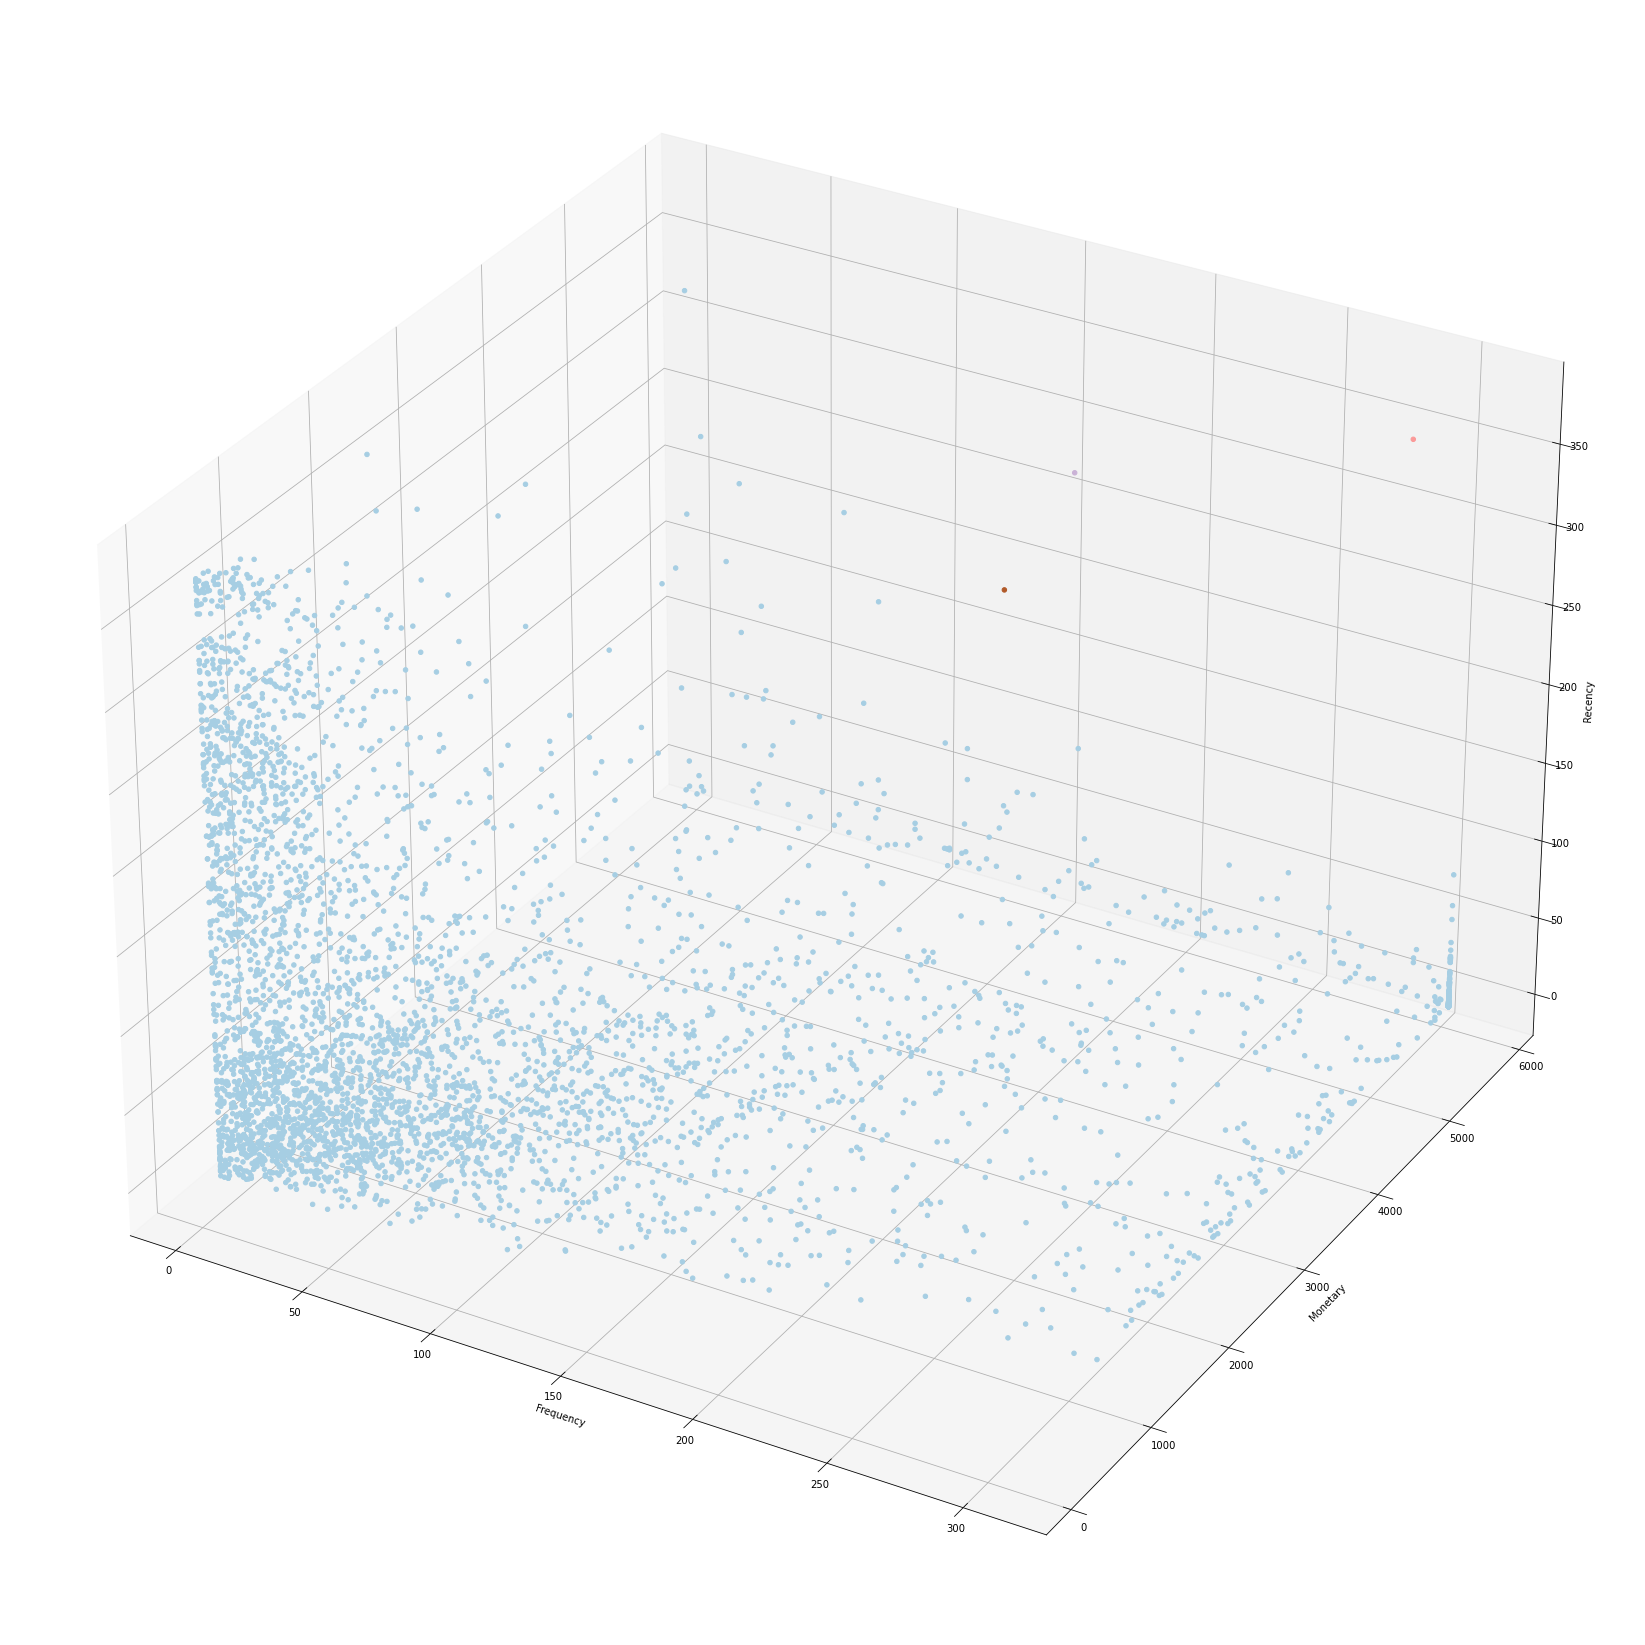

In [33]:
import numpy as np
import pandas as pd
#import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='single')
cluster.fit_predict(df_pca_minmax)

customer_model7 = customer.copy()
customer_model7['cluster_id'] = cluster.labels_


fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot( projection = '3d')
x = customer_model6['Frequency']
y = customer_model6['Monetary']
z = customer_model6['Recency']
cmap = ListedColormap(sns.color_palette("Paired"))
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency")   
ax.scatter(x, y, z, c = customer_model7['cluster_id'], cmap = cmap , alpha=1)
plt.show()


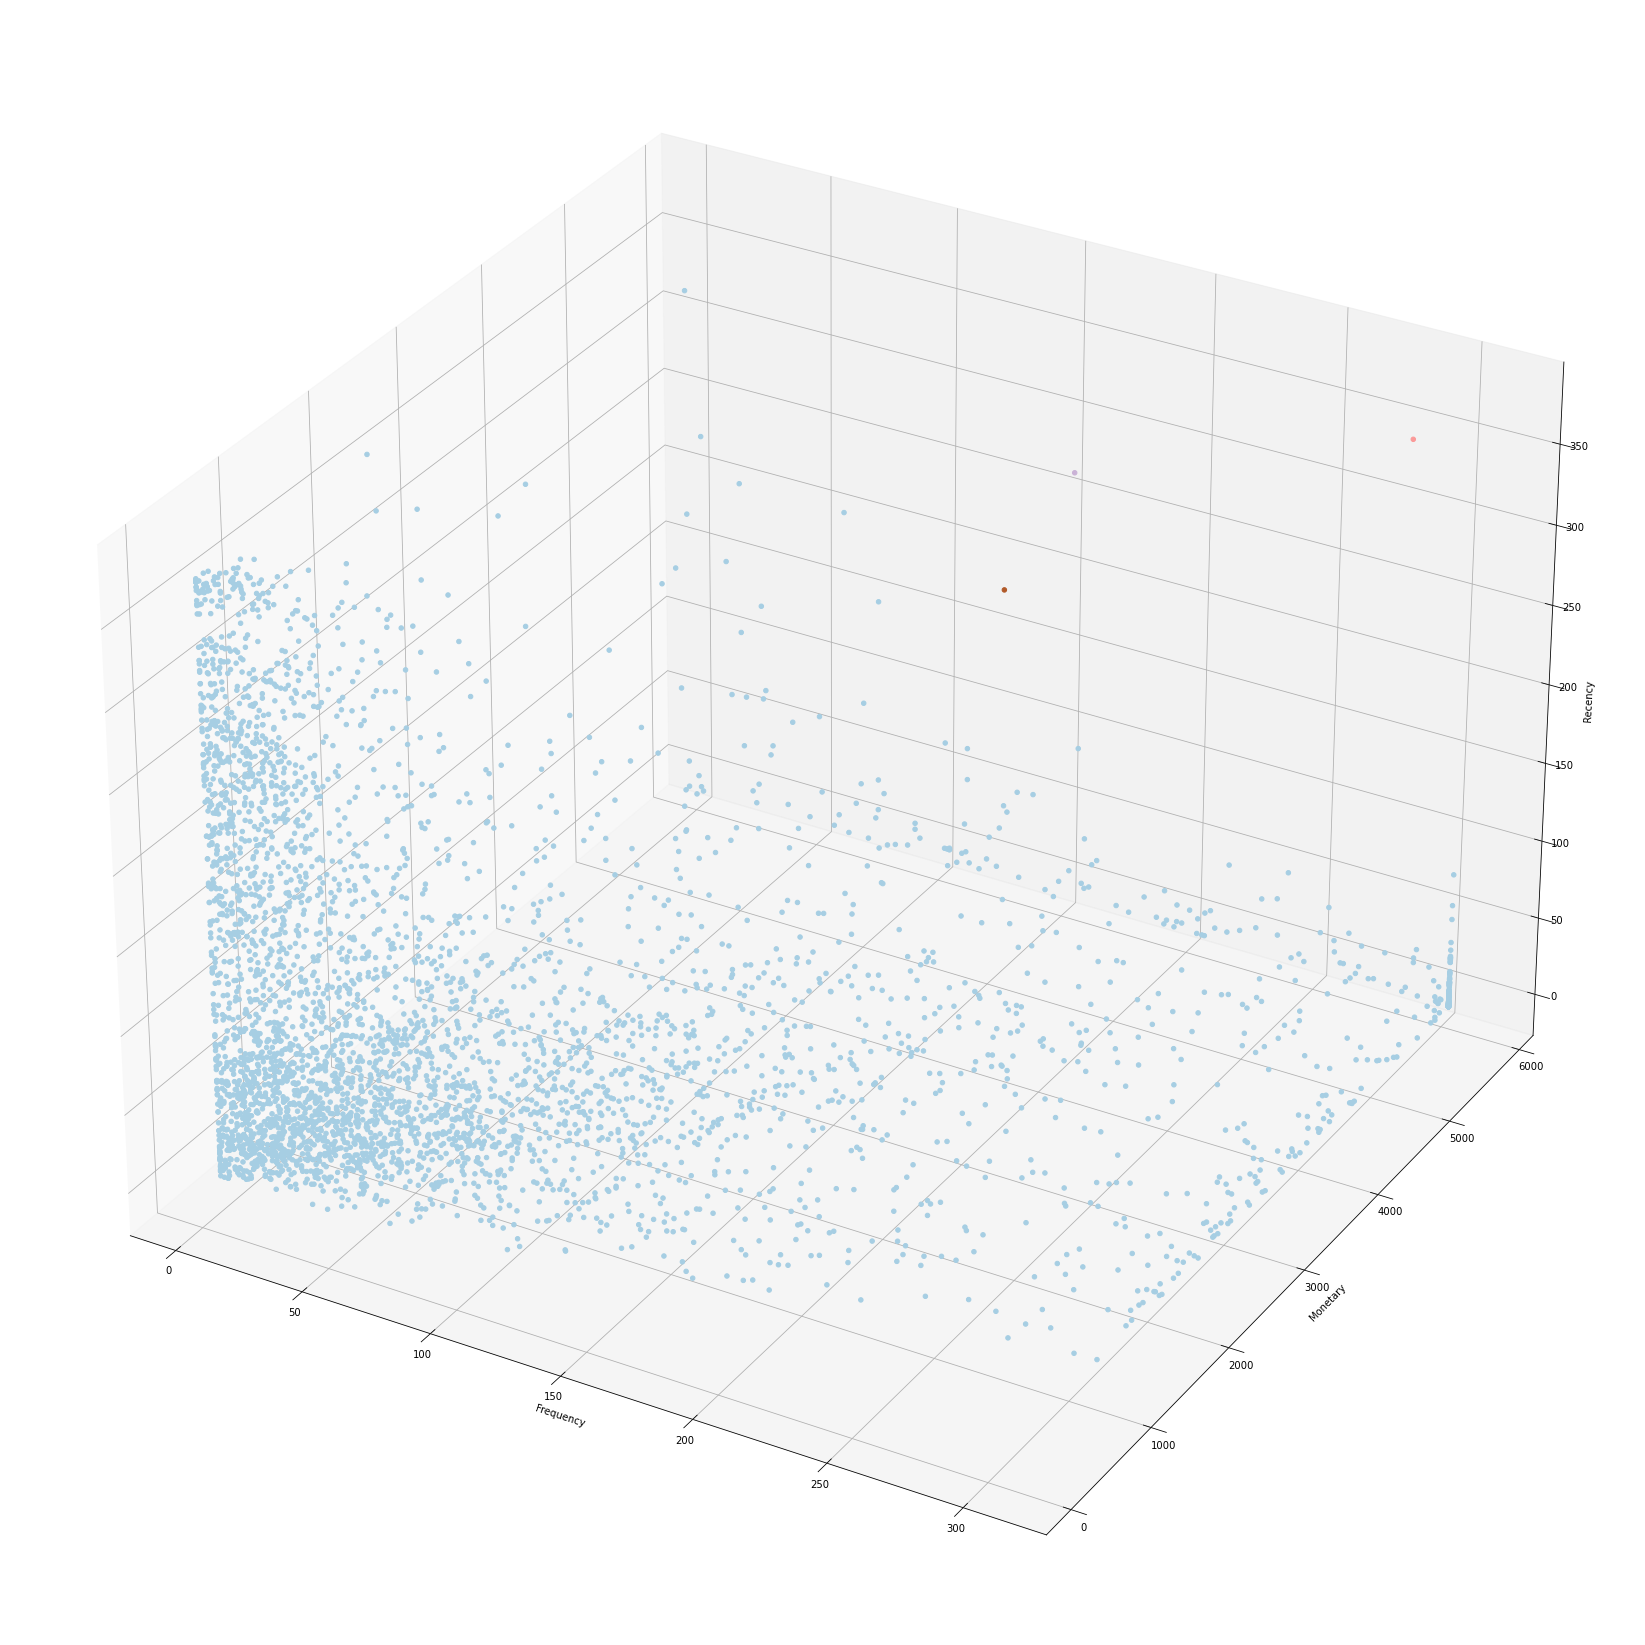

In [34]:
cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='single')
cluster.fit_predict(df_pca_z)

customer_model5 = customer.copy()
customer_model5['cluster_id'] = cluster.labels_
#df_pca_z['cluster_id'] = cluster.labels_

fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot( projection = '3d')
x = customer_model5['Frequency']
y = customer_model5['Monetary']
z = customer_model5['Recency']
cmap = ListedColormap(sns.color_palette("Paired"))
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency")   
ax.scatter(x, y, z, c = customer_model5['cluster_id'], cmap = cmap , alpha=1)
plt.show()


Not performing well on normalised data.

## Gausian Mixture

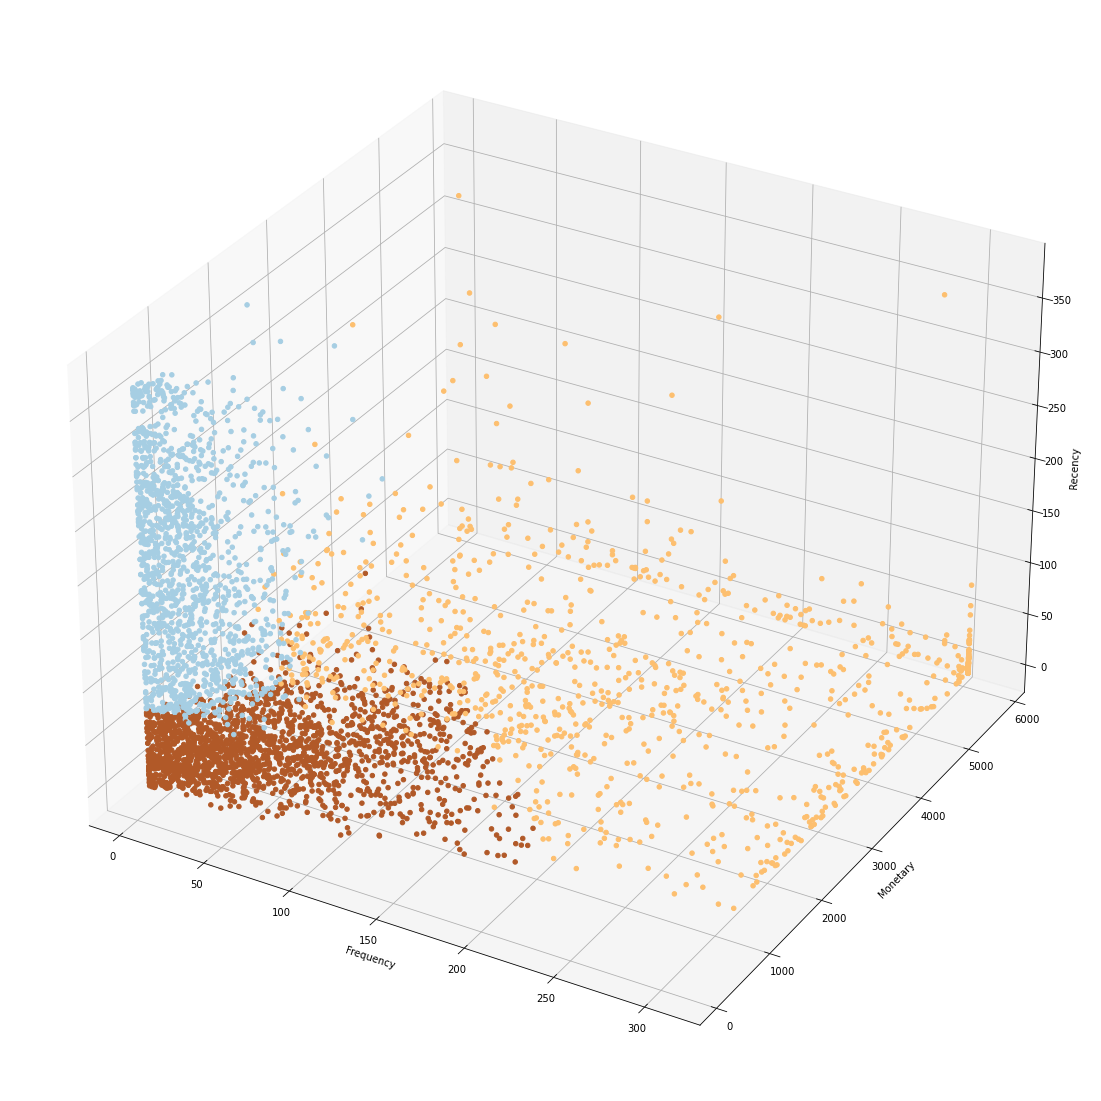

In [35]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(df_pca_minmax)

#predictions from gmm
customer_model6 = customer.copy()
customer_model6['cluster_id'] =  gmm.predict(df_pca_minmax)

fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot( projection = '3d')
x = customer_model6['Frequency']
y = customer_model6['Monetary']
z = customer_model6['Recency']
cmap = ListedColormap(sns.color_palette("Paired"))
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency")   
ax.scatter(x, y, z, c = customer_model6['cluster_id'], cmap = cmap , alpha=1)
plt.show()


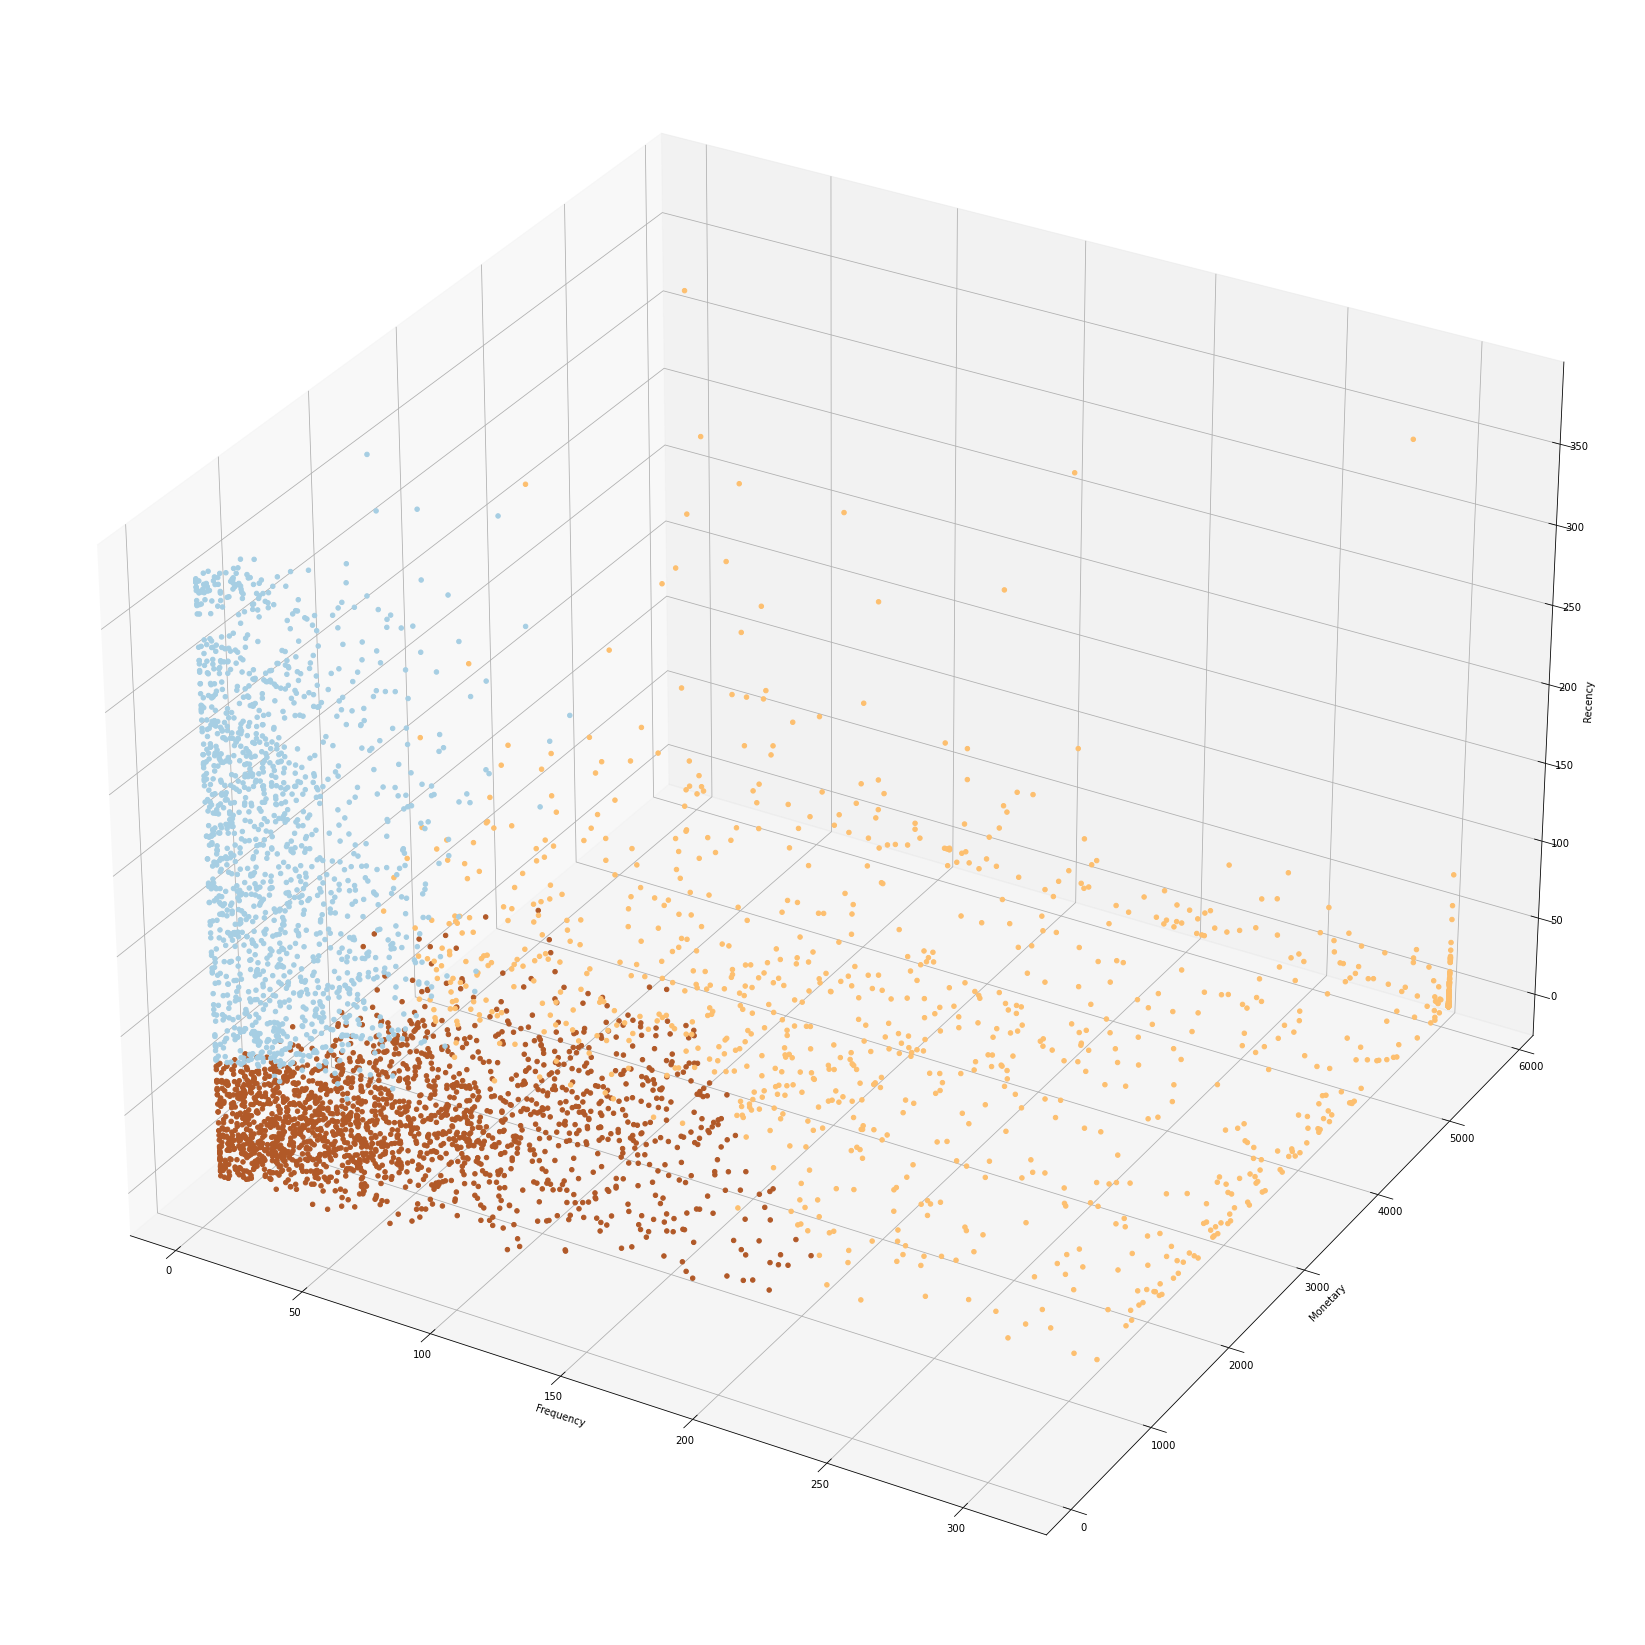

In [36]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df_pca_z)

#predictions from gmm
customer_model7 = customer.copy()
customer_model7['cluster_id'] =  gmm.predict(df_pca_z)

fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot( projection = '3d')
x = customer_model7['Frequency']
y = customer_model7['Monetary']
z = customer_model7['Recency']
cmap = ListedColormap(sns.color_palette("Paired"))
ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency")   
ax.scatter(x, y, z, c = customer_model7['cluster_id'], cmap = cmap , alpha=1)
plt.show()


Did not work well on normalised data.

## Model Evaluation

find customers with value, check their descriptions

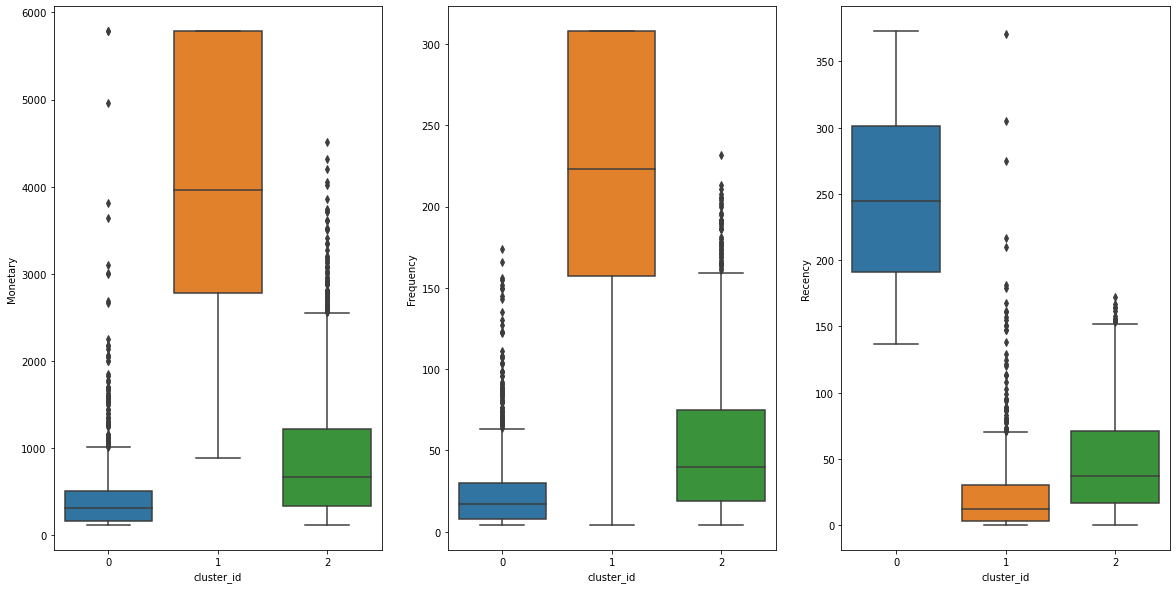

In [37]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot( x="cluster_id", y="Monetary", data=customer_model1)

plt.subplot(1,3,2)
sns.boxplot( x="cluster_id", y="Frequency", data=customer_model1)

plt.subplot(1,3,3)
sns.boxplot( x="cluster_id", y="Recency", data=customer_model1)
plt.show()

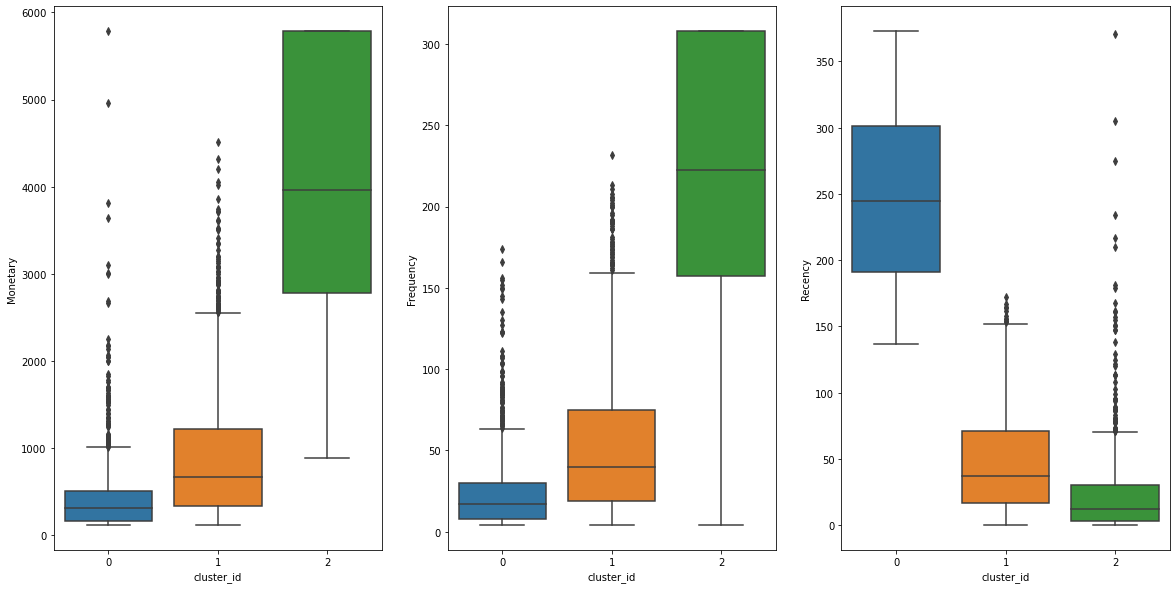

In [38]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot( x="cluster_id", y="Monetary", data=customer_model2)

plt.subplot(1,3,2)
sns.boxplot( x="cluster_id", y="Frequency", data=customer_model2)

plt.subplot(1,3,3)
sns.boxplot( x="cluster_id", y="Recency", data=customer_model2)
plt.show()

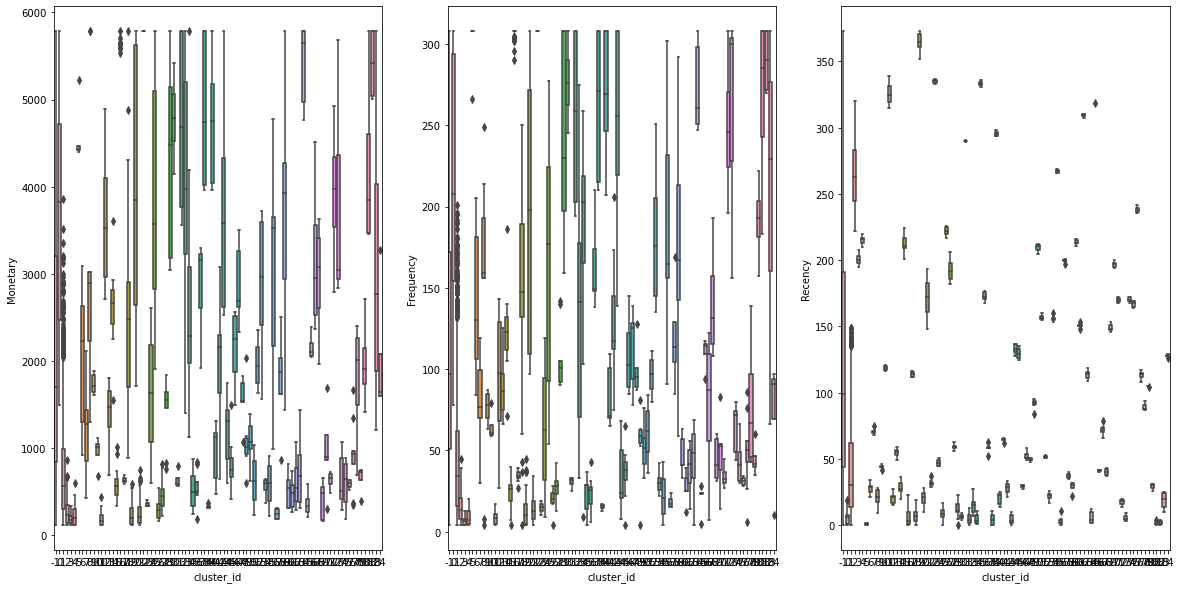

In [39]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot( x="cluster_id", y="Monetary", data=customer_model3)

plt.subplot(1,3,2)
sns.boxplot( x="cluster_id", y="Frequency", data=customer_model3)

plt.subplot(1,3,3)
sns.boxplot( x="cluster_id", y="Recency", data=customer_model3)
plt.show()

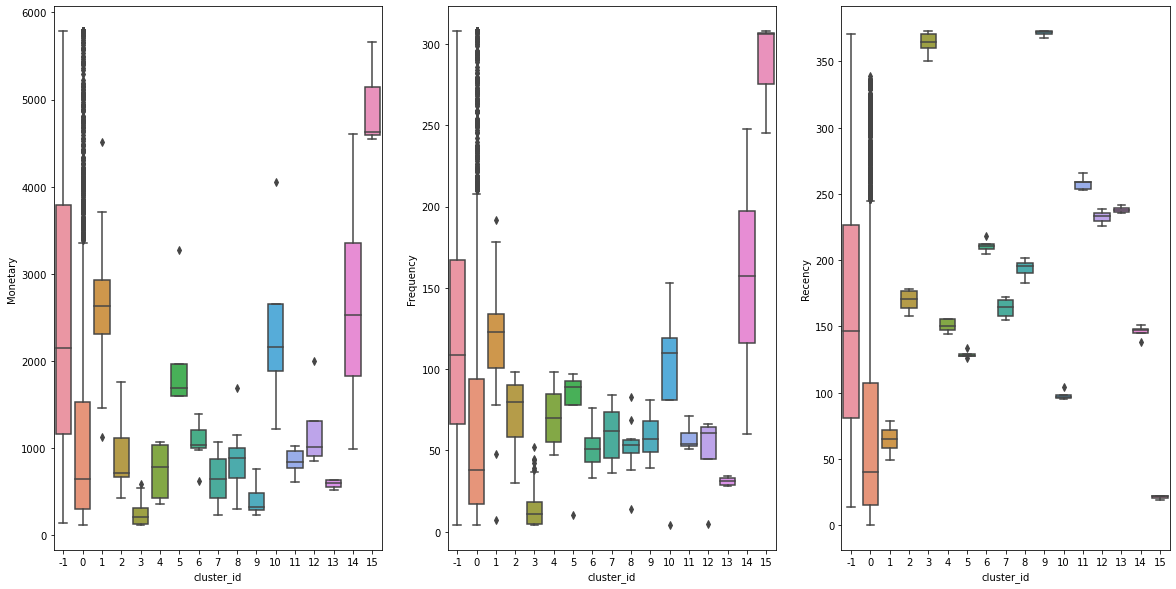

In [40]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot( x="cluster_id", y="Monetary", data=customer_model4)

plt.subplot(1,3,2)
sns.boxplot( x="cluster_id", y="Frequency", data=customer_model4)

plt.subplot(1,3,3)
sns.boxplot( x="cluster_id", y="Recency", data=customer_model4)
plt.show()

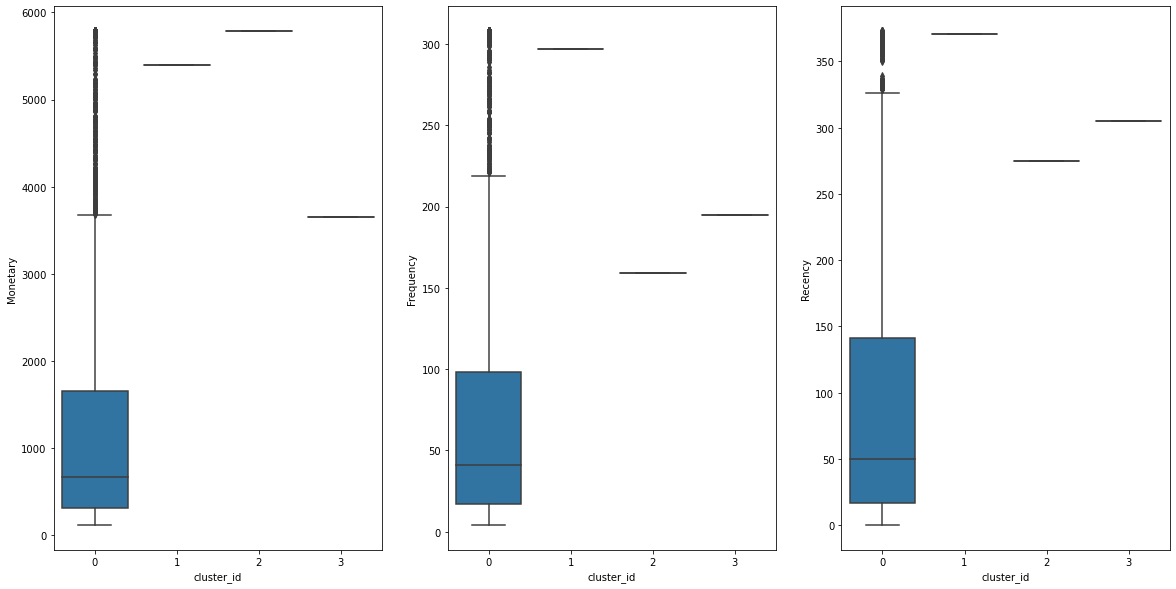

In [41]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot( x="cluster_id", y="Monetary", data=customer_model5)

plt.subplot(1,3,2)
sns.boxplot( x="cluster_id", y="Frequency", data=customer_model5)

plt.subplot(1,3,3)
sns.boxplot( x="cluster_id", y="Recency", data=customer_model5)
plt.show()

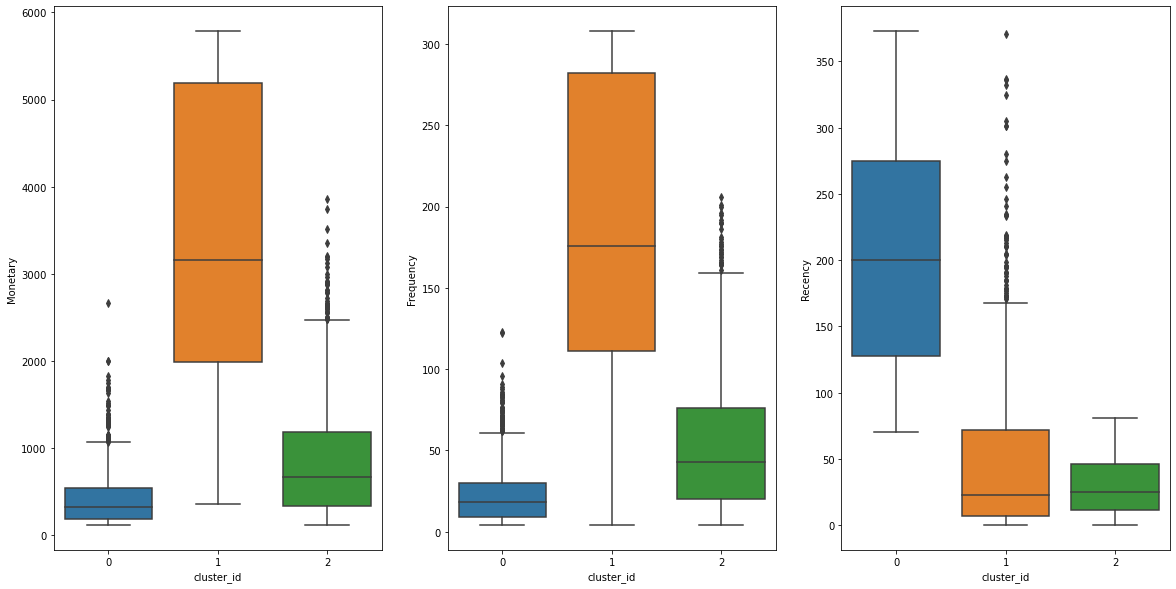

In [42]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot( x="cluster_id", y="Monetary", data=customer_model6)

plt.subplot(1,3,2)
sns.boxplot( x="cluster_id", y="Frequency", data=customer_model6)

plt.subplot(1,3,3)
sns.boxplot( x="cluster_id", y="Recency", data=customer_model6)
plt.show()